## Exercise 1 - American Airlines Employees
• The following repository https://drive.google.com/drive/folders/1MBXTCbUJbX6kRo4fnjsbOGvOZZ7SQFkV?
usp=sharing contains few files with the number of part-time and full-time employees of the major
airline companies in the United States:
- americal airline empl.txt
- delta airline empl.txt
- federal express empl.txt
- united airline empl.txt

In [47]:
library(tidyverse)

### 1.1 read the data and import them in a data.frame or tibble structure

In [3]:
#As data.frame
american <- read.table("american_airline_empl.txt", header=T)
delta <- read.table("delta_airline_empl.txt", header=T)
federal <- read.table("federal_express_empl.txt", header=T)
united <- read.table("united_airline_empl.txt", header=T)

### 1.2 merge the four data tibble in a common tibble

In [4]:
#add identifier
american <- american %>% add_column('Company'='American_airlines')
delta <- delta %>% add_column('Company'='Delta_airlines')
federal <- federal %>% add_column('Company'='Federal_airlines')
united <- united %>% add_column('Company'='United_airlines')

In [5]:
tot <- rbind(american,delta,federal,united)

### 1.3 produce a plot of the behaviour of the employees as a function of time for all four companies,separately for the number of full-time and part-time employees

In [6]:
#NOTE : if we didn't already have the separate dataframe, we could extract them from tot as follows
#american <- tot[tot$Company=='American_airlines',]

In [7]:
#Remove all commas from chars, to convert them into numbers
i <- seq(1:1588)
j<- seq(1:5)
tot[i,j] <- apply(tot[i, j], 2,           
                    function(x) gsub(',','',x)) #this,however, converts also Month and Year as char


#convert columns to numeric
tot <- tot %>% mutate_at(c('Month', 'Year', 'Full.time','Part.time','Grand.Total'), as.numeric)

In [8]:
tot[2,]

,Month,Year,Full.time,Part.time,Grand.Total,Company
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,2,1990,68725,9273,77998,American_airlines


#### American

In [9]:
american <- tot[tot$Company=='American_airlines',]
#Let us plot as a function of the year, and take a mean of the average number of employees in one year
am_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , american ,mean)

In [10]:
options(repr.plot.width=20, repr.plot.height=10)


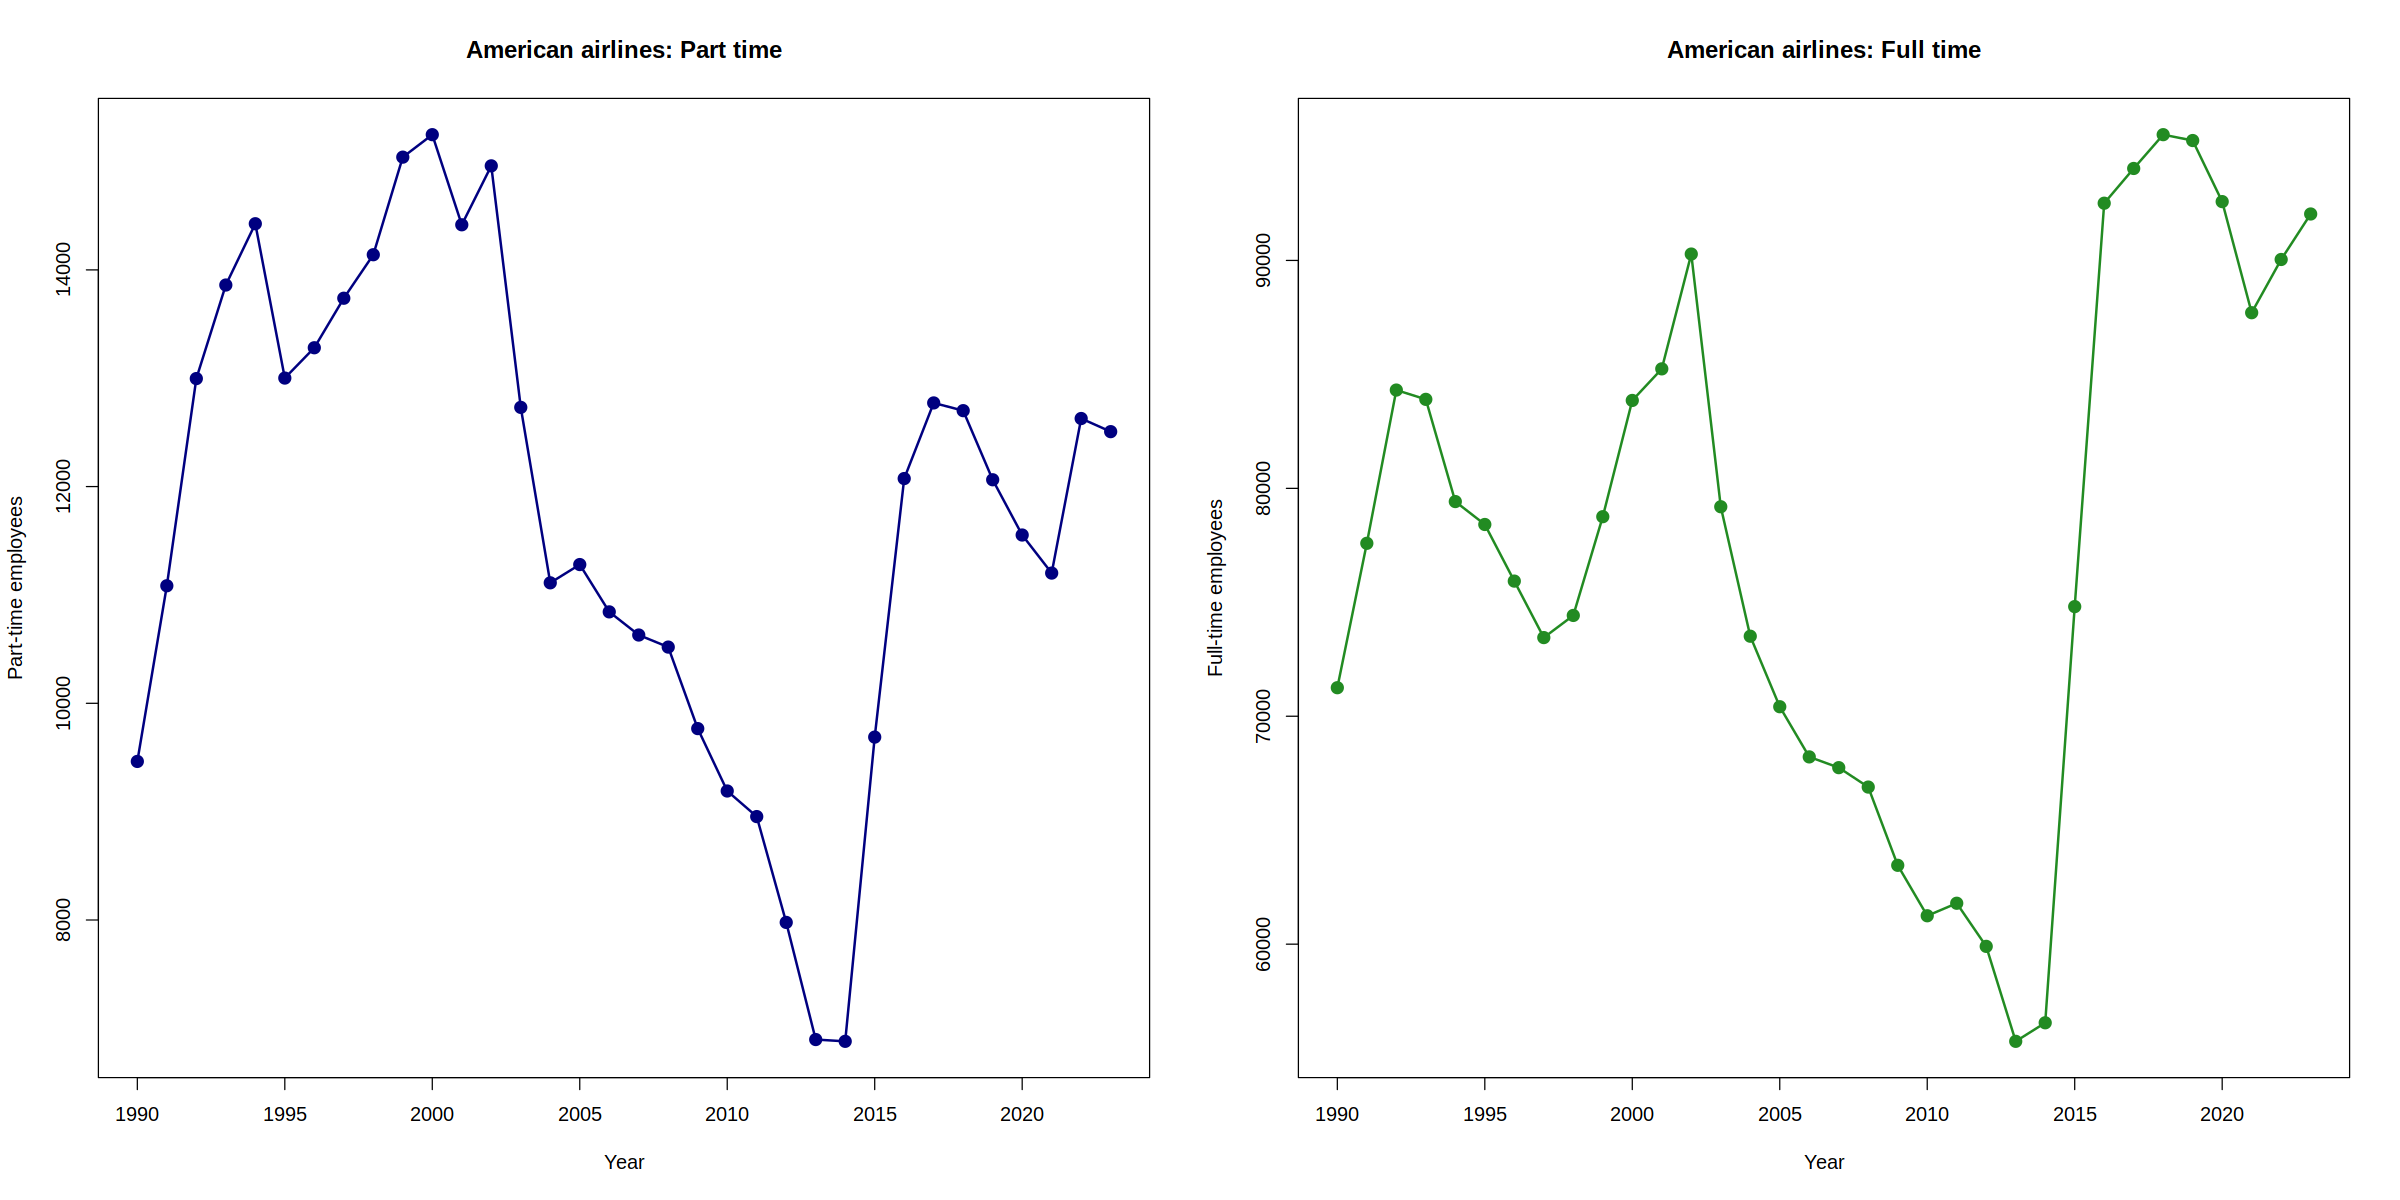

In [11]:
par(mfrow=c(1,2))
plot(am_plot$Year, am_plot$Part.time, pch =20 , cex = 2, col = " navy" ,main="American airlines: Part time",
     xlab="Year", ylab="Part-time employees" )
lines(am_plot$Year, am_plot$Part.time, col = "navy" , lty = 1, lwd=2)

plot(am_plot$Year, am_plot$Full.time, pch =20 , cex = 2, col = "forestgreen",main="American airlines: Full time",
     xlab="Year", ylab="Full-time employees" )
lines(am_plot$Year, am_plot$Full.time, col = "forestgreen" , lwd = 2 )


#### Delta

In [12]:
delta <- tot[tot$Company=='Delta_airlines',]
#Let us plot as a function of the year, and take a mean of the average number of employees in one year
d_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , delta ,mean)

In [13]:
options(repr.plot.width=20, repr.plot.height=10)

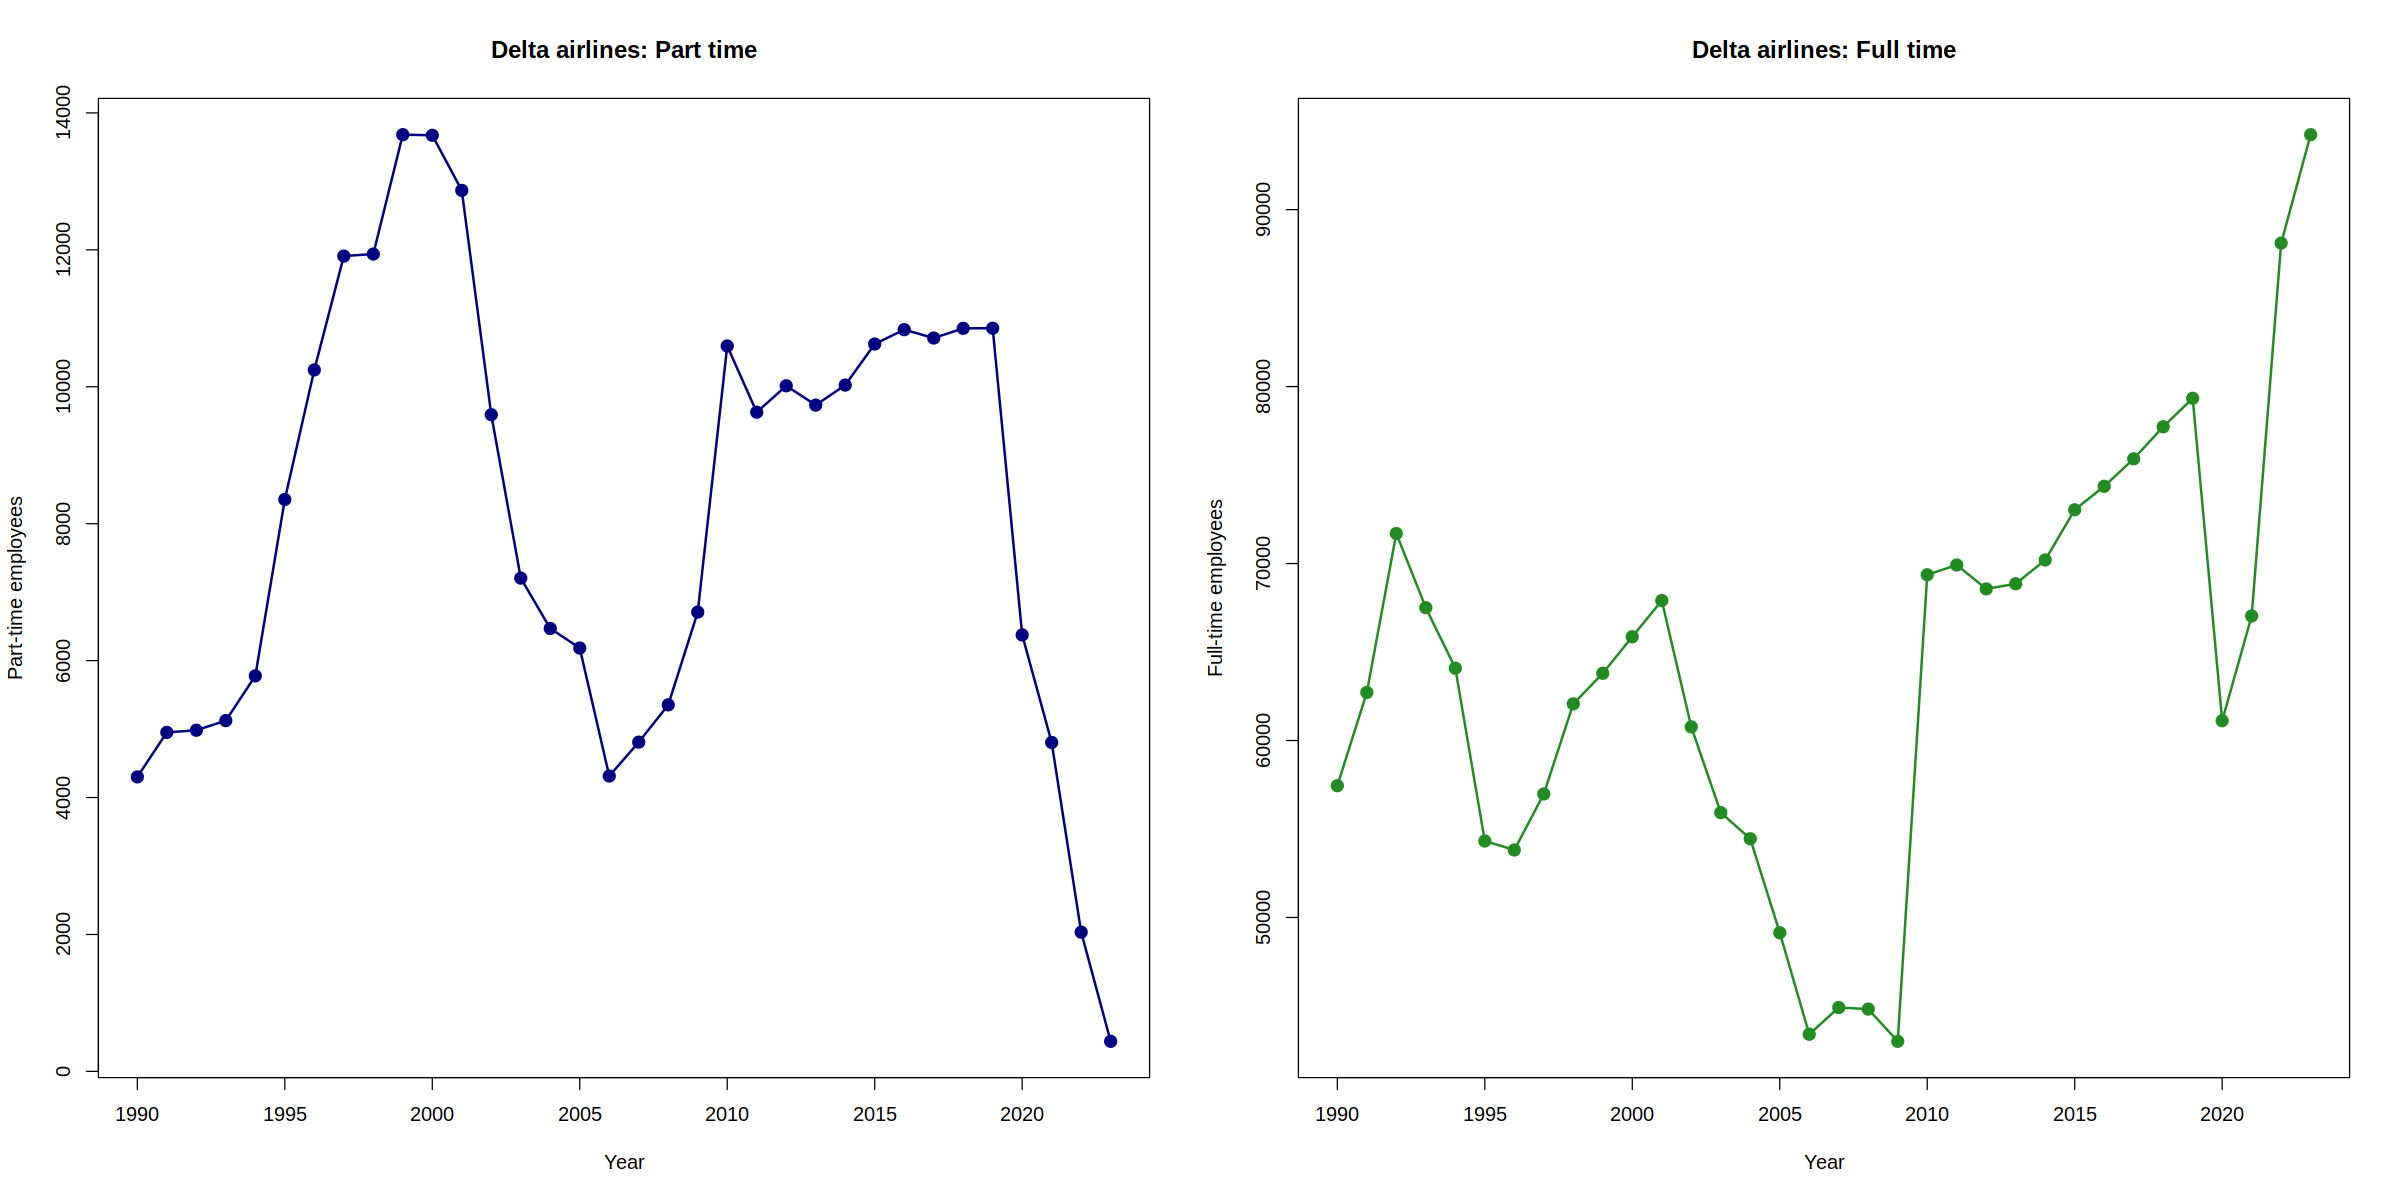

In [14]:
par(mfrow=c(1,2))
plot(d_plot$Year, d_plot$Part.time, pch =20 , cex = 2, col = " navy ",main="Delta airlines: Part time",
     xlab="Year", ylab="Part-time employees")
lines(d_plot$Year, d_plot$Part.time, col = "navy" , lty = 1, lwd=2)

plot(d_plot$Year, d_plot$Full.time, pch =20 , cex = 2, col = "forestgreen",main="Delta airlines: Full time",
     xlab="Year", ylab="Full-time employees")
lines(d_plot$Year, d_plot$Full.time, col = "forestgreen" , lwd = 2 )


#### Federal

In [15]:
fed <- tot[tot$Company=='Federal_airlines',]
#Let us plot as a function of the year, and take a mean of the average number of employees in one year
f_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , fed ,mean)

In [16]:
options(repr.plot.width=20, repr.plot.height=10)

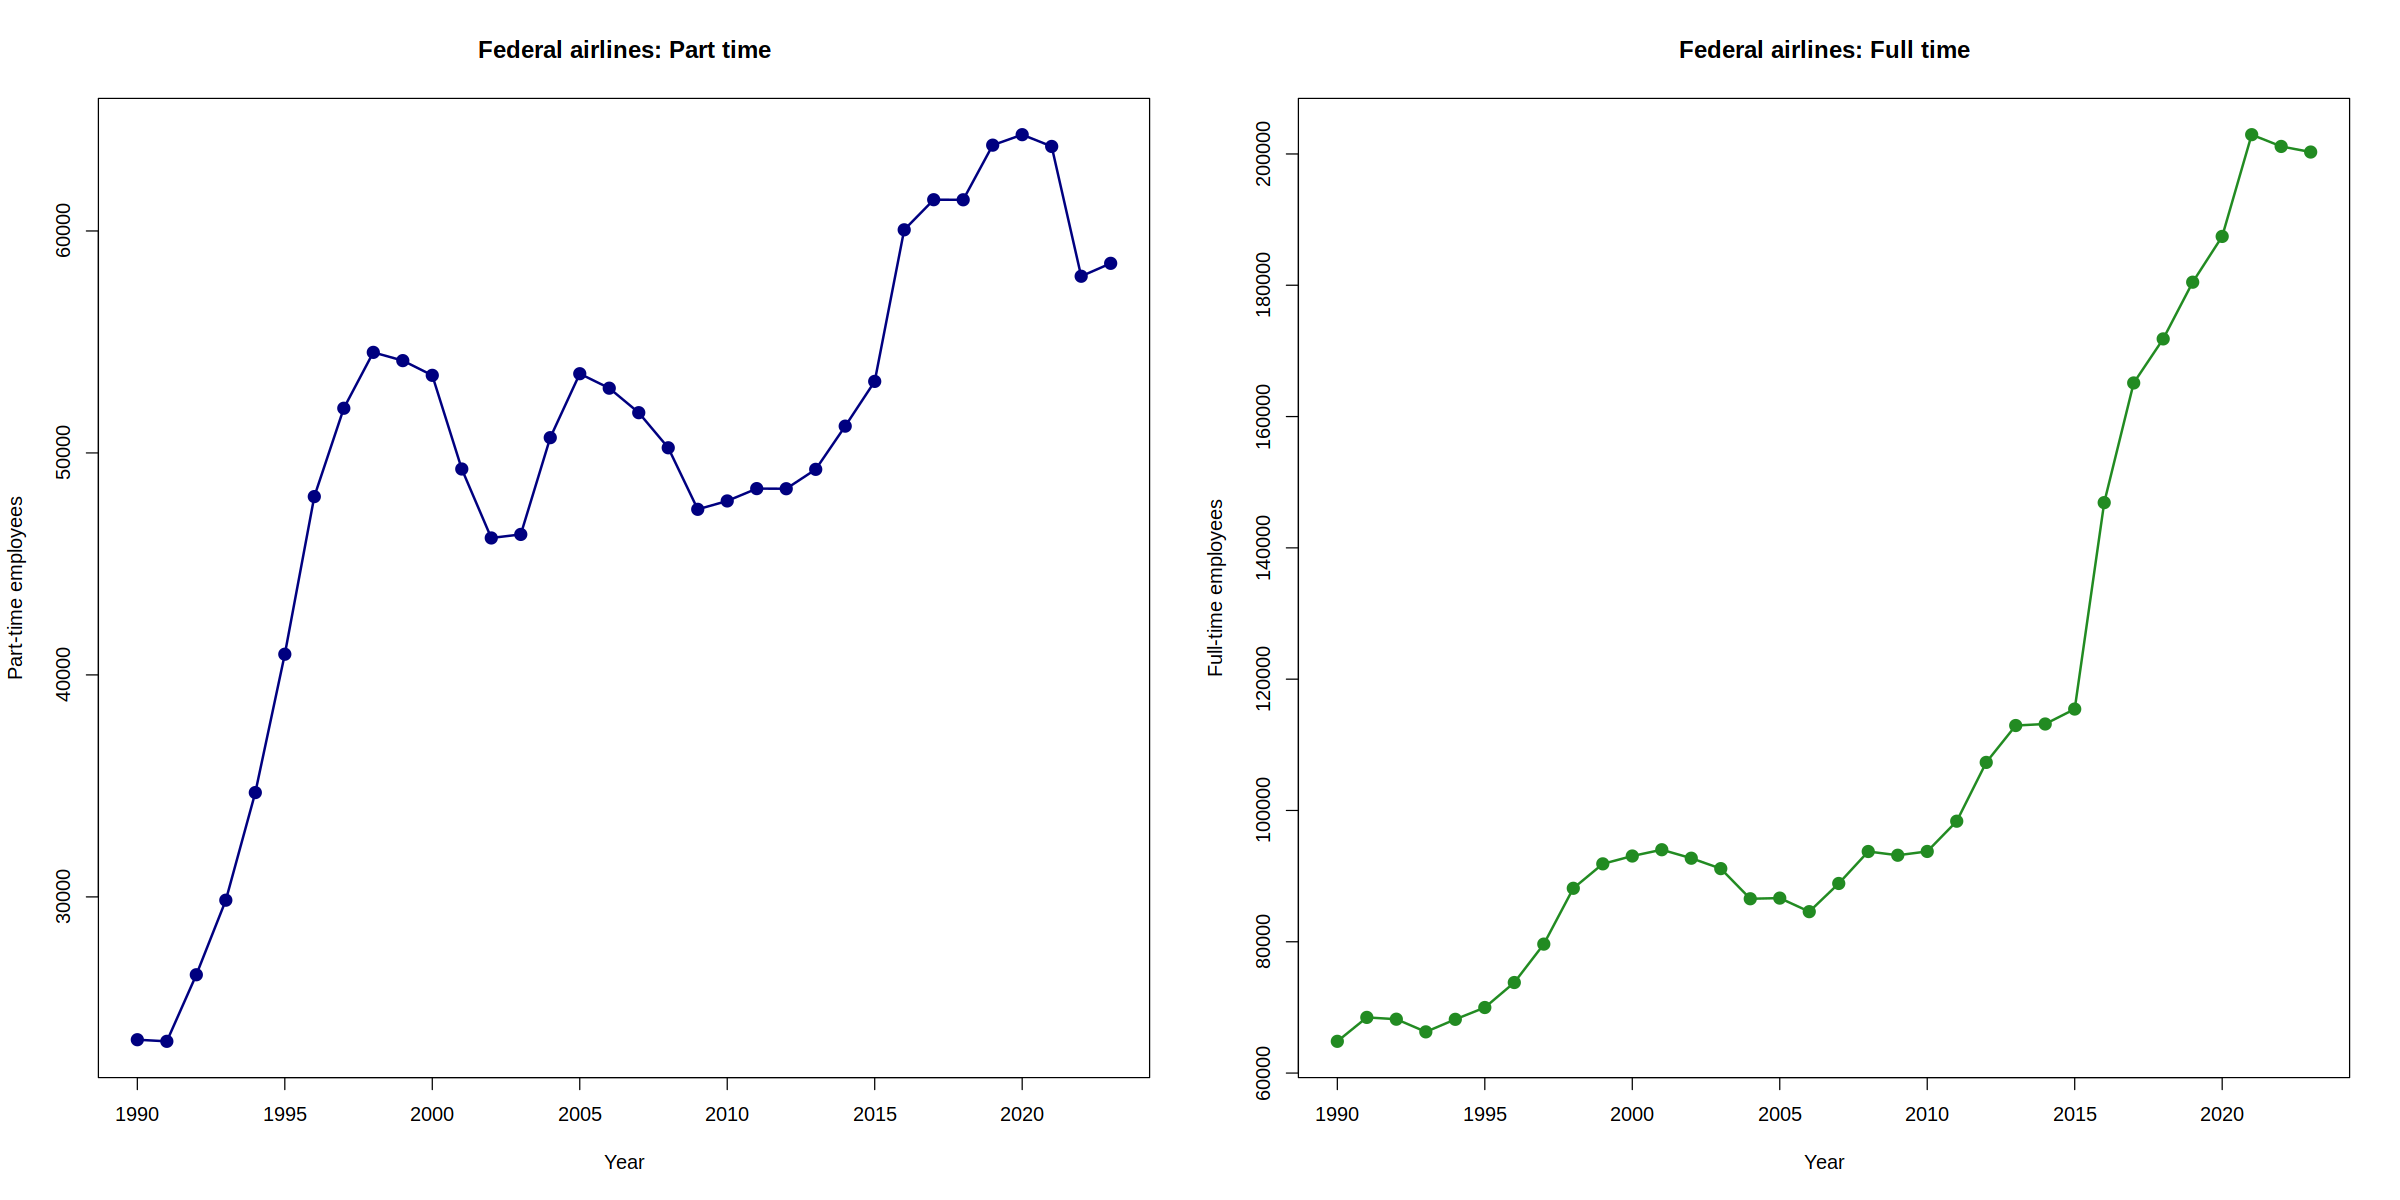

In [17]:
par(mfrow=c(1,2))
plot(f_plot$Year, f_plot$Part.time, pch =20 , cex = 2, col = " navy ",main="Federal airlines: Part time",
     xlab="Year", ylab="Part-time employees")
lines(f_plot$Year, f_plot$Part.time, col = "navy" , lty = 1, lwd=2)

plot(f_plot$Year, f_plot$Full.time, pch =20 , cex = 2, col = "forestgreen",main="Federal airlines: Full time",
     xlab="Year", ylab="Full-time employees")
lines(f_plot$Year, f_plot$Full.time, col = "forestgreen" , lwd = 2 )


#### United

In [18]:
un <- tot[tot$Company=='United_airlines',]
#Let us plot as a function of the year, and take a mean of the average number of employees in one year
u_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , un ,mean)

In [19]:
options(repr.plot.width=20, repr.plot.height=10)

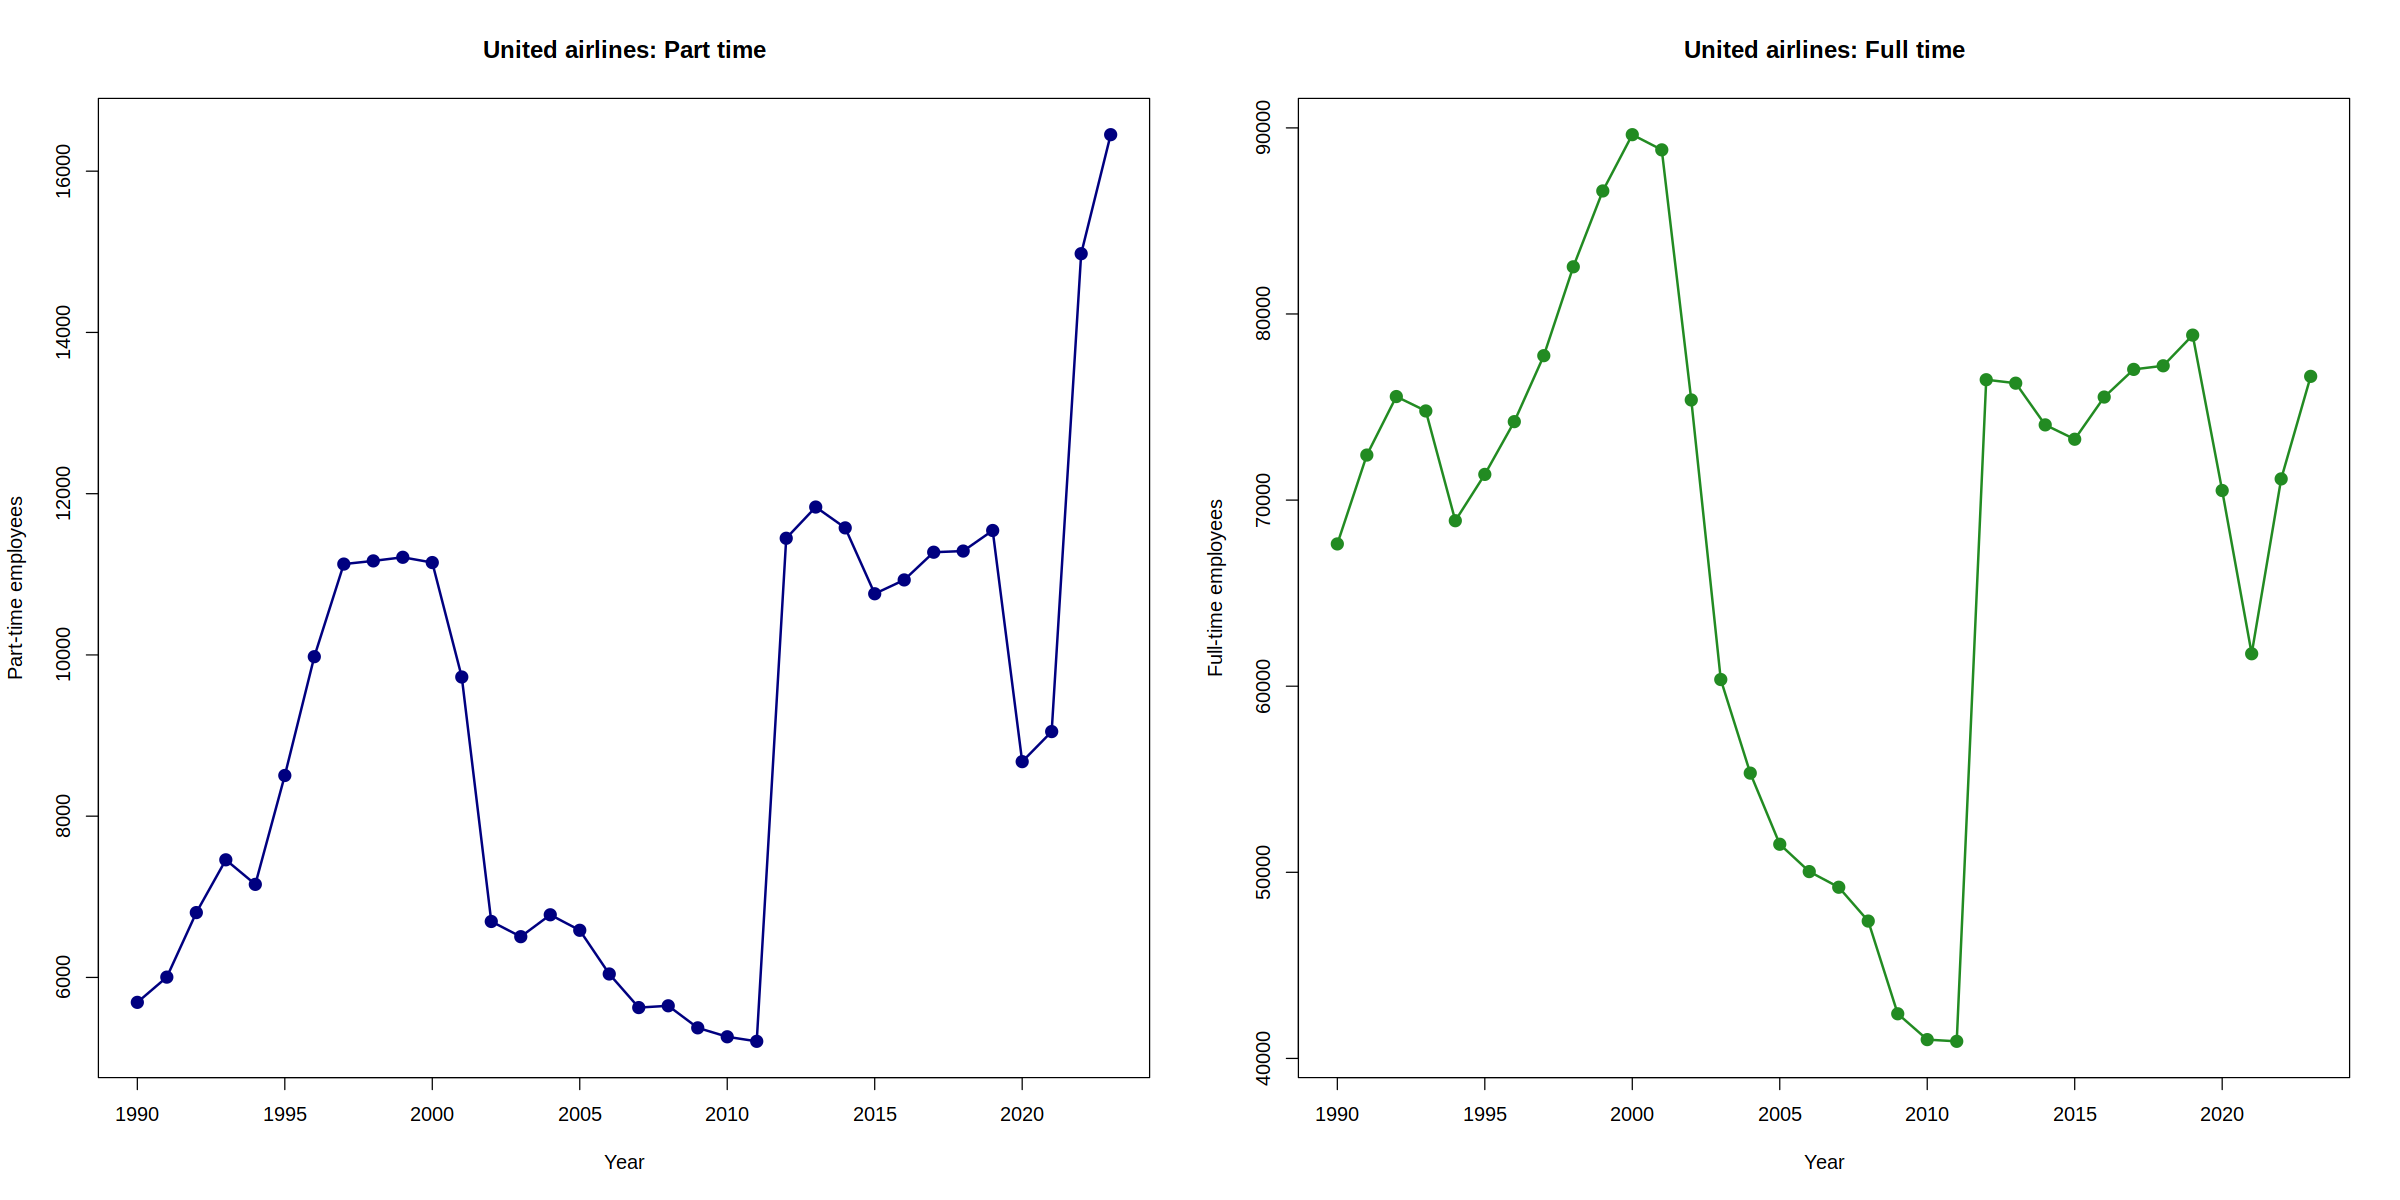

In [20]:
par(mfrow=c(1,2))
plot(u_plot$Year, u_plot$Part.time, pch =20 , cex = 2, col = " navy ",main="United airlines: Part time",
     xlab="Year", ylab="Part-time employees")
lines(u_plot$Year, u_plot$Part.time, col = "navy" , lty = 1, lwd=2)

plot(u_plot$Year, u_plot$Full.time, pch =20 , cex = 2, col = "forestgreen",main="United airlines: Full time",
     xlab="Year", ylab="Full-time employees")
lines(u_plot$Year, u_plot$Full.time, col = "forestgreen" , lwd = 2 )


### 1.4 when did each company reach the minimum and maximum number of employess ?

In [41]:
#American
min = american[american$Grand.Total == american$Grand.Total %>% min(),]
cat('The minimum number of employees is ', min$Grand.Total, ' in month ', min$Month, ' of Year ', min$Year, '\n')
max = american[american$Grand.Total == american$Grand.Total %>% max(),]
cat('The maximum number of employees is ', max$Grand.Total, ' in month ', max$Month, ' of Year ', max$Year)

The minimum number of employees is  62290  in month  9  of Year  2013 
The maximum number of employees is  109171  in month  6  of Year  2018

In [42]:
#Delta
min = delta[delta$Grand.Total == delta$Grand.Total %>% min(),]
cat('The minimum number of employees is ', min$Grand.Total, ' in month ', min$Month, ' of Year ', min$Year, '\n')
max = delta[delta$Grand.Total == delta$Grand.Total %>% max(),]
cat('The maximum number of employees is ', max$Grand.Total, ' in month ', max$Month, ' of Year ', max$Year)

The minimum number of employees is  46410  in month  11  of Year  2006 
The maximum number of employees is  94675  in month  1  of Year  2023

In [43]:
#Federal
min = fed[fed$Grand.Total == fed$Grand.Total %>% min(),]
cat('The minimum number of employees is ', min$Grand.Total, ' in month ', min$Month, ' of Year ', min$Year, '\n')
max = fed[fed$Grand.Total == fed$Grand.Total %>% max(),]
cat('The maximum number of employees is ', max$Grand.Total, ' in month ', max$Month, ' of Year ', max$Year)

The minimum number of employees is  84885  in month  1  of Year  1990 
The maximum number of employees is  270383  in month  3  of Year  2021

In [44]:
#United
min = un[un$Grand.Total == un$Grand.Total %>% min(),]
cat('The minimum number of employees is ', min$Grand.Total, ' in month ', min$Month, ' of Year ', min$Year, '\n')
max = un[un$Grand.Total == un$Grand.Total %>% max(),]
cat('The maximum number of employees is ', max$Grand.Total, ' in month ', max$Month, ' of Year ', max$Year)

The minimum number of employees is  45781  in month  6  of Year  2011 
The maximum number of employees is  102046  in month  3  of Year  2001

### 1.5 plot the fraction of part-time worker over the total employess as a function of time

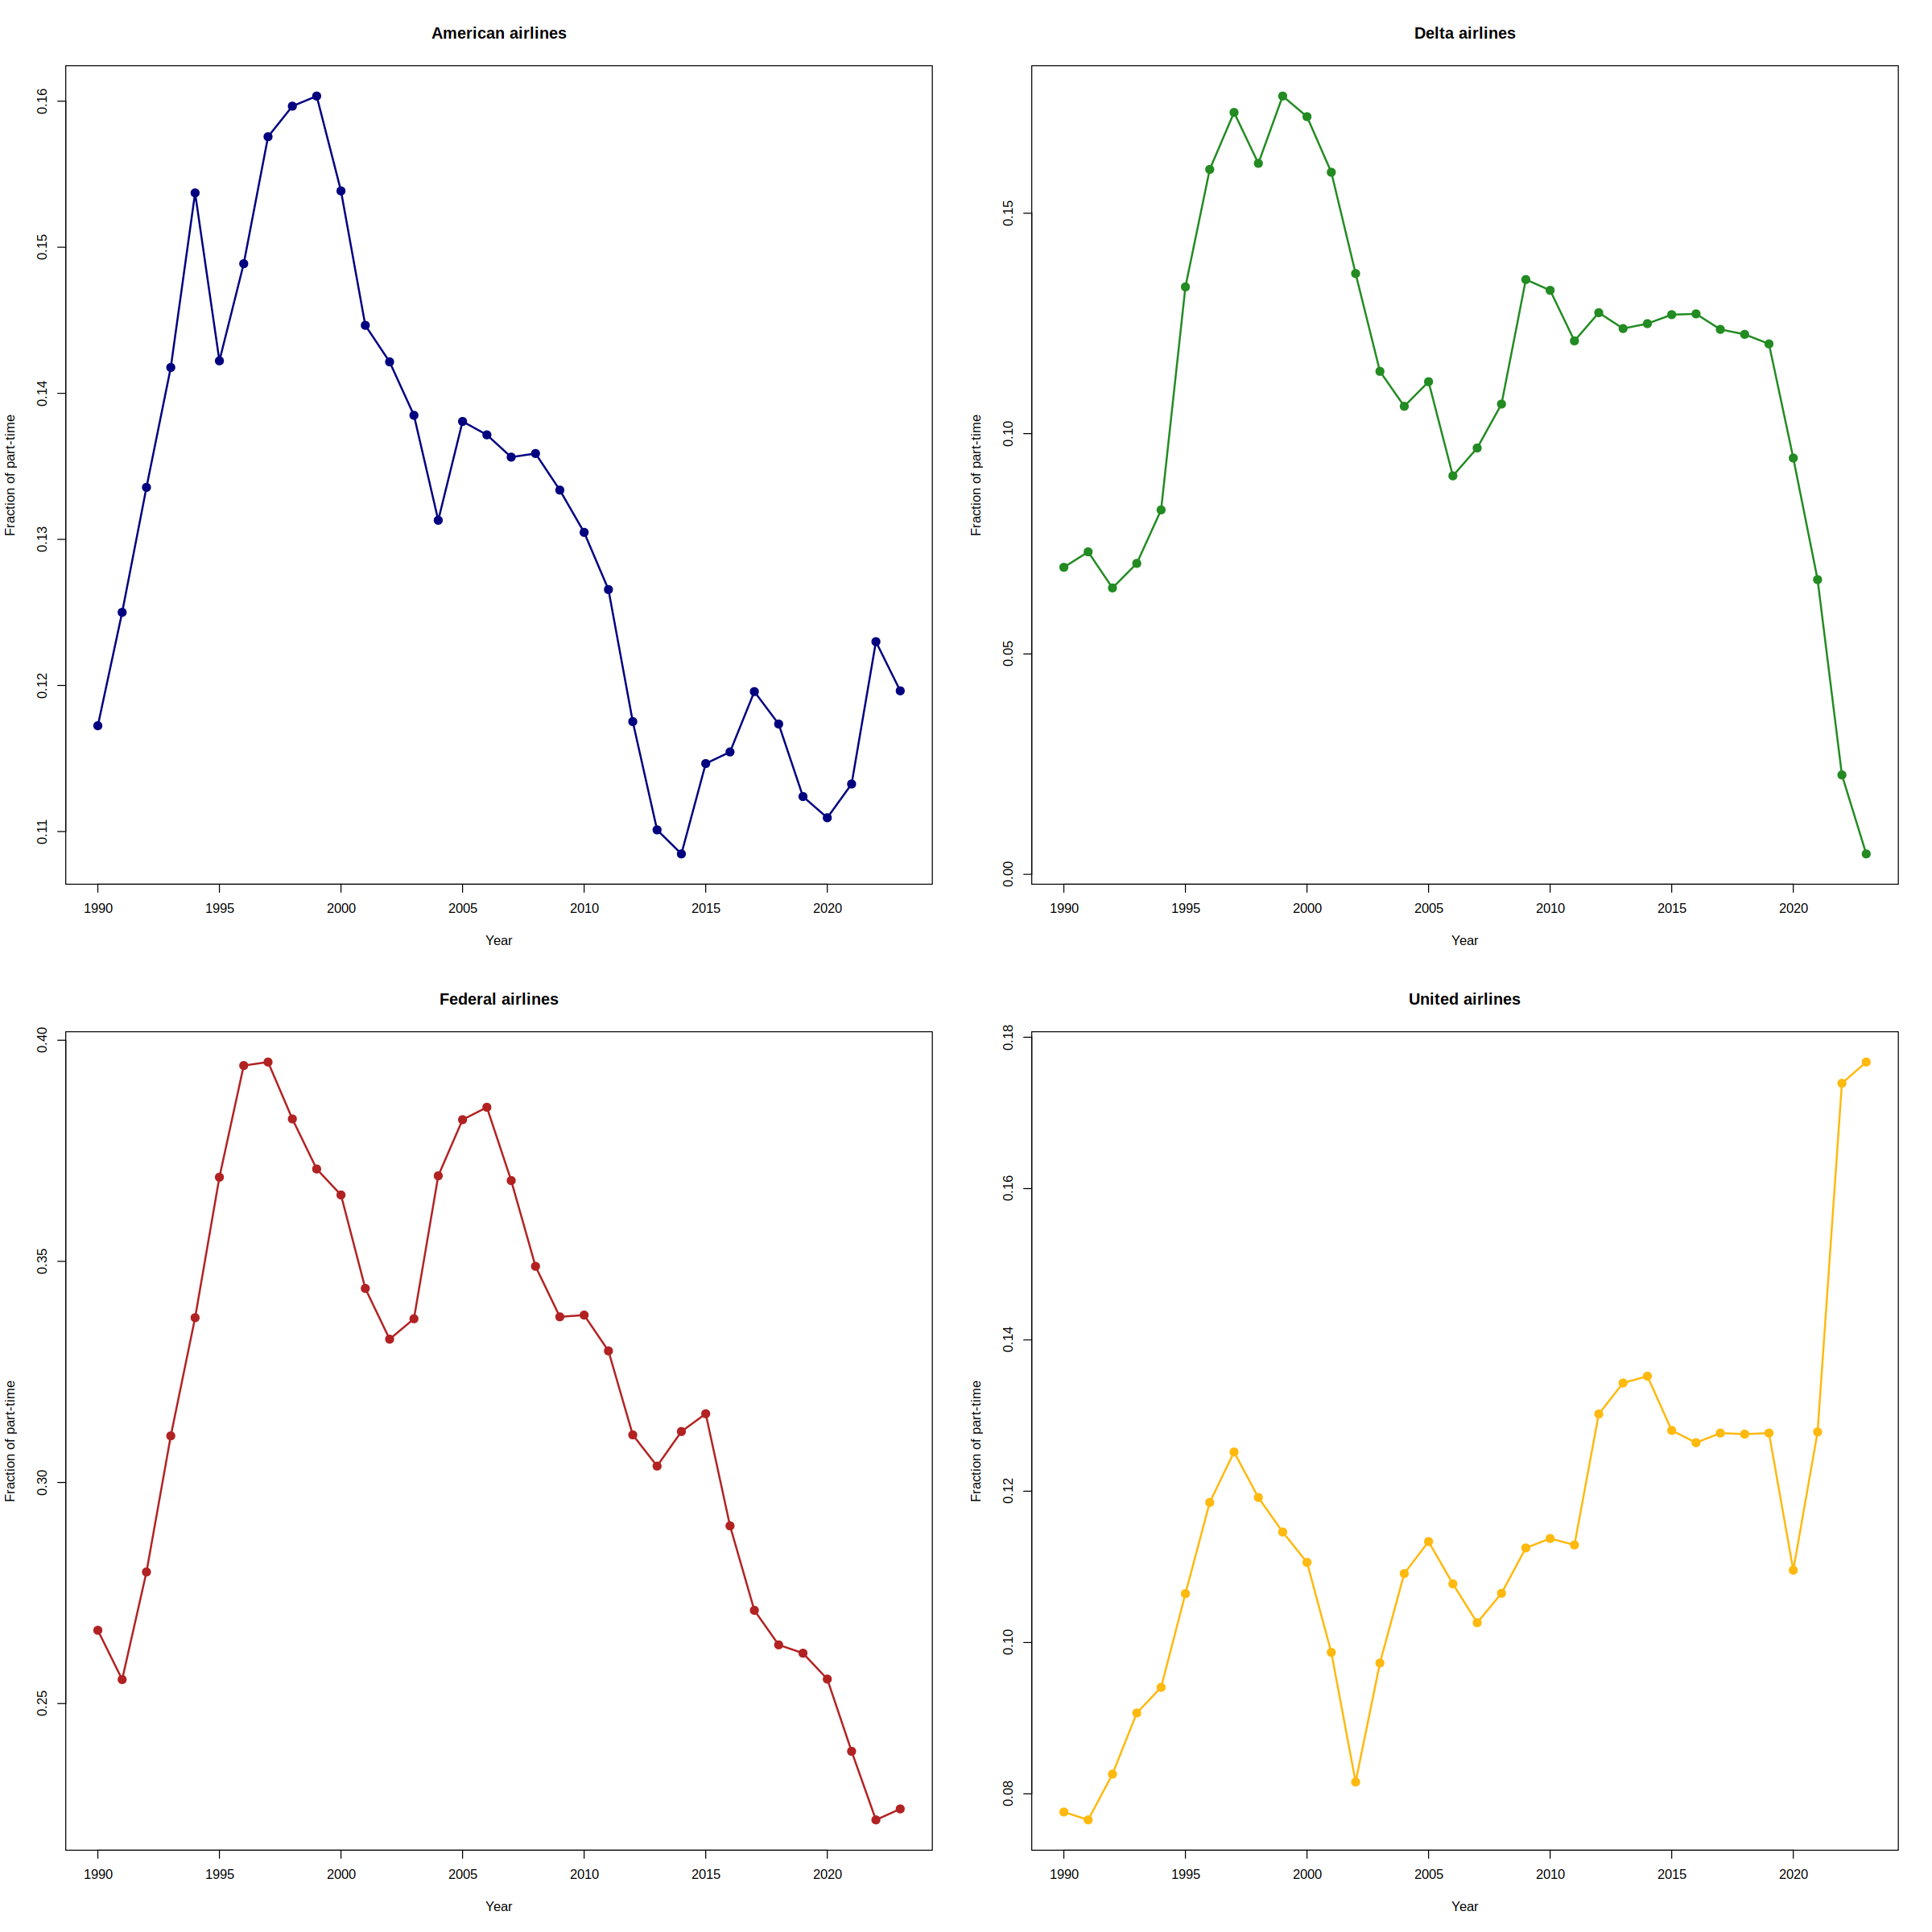

In [48]:
options(repr.plot.width=20, repr.plot.height=20)
par(mfrow=c(2,2))

u_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , un ,mean)


plot(am_plot$Year, am_plot$Part.time/am_plot$Grand.Total, pch = 20, cex=2, col='navy', main = 'American airlines',
    xlab='Year', ylab='Fraction of part-time')
lines(am_plot$Year, am_plot$Part.time/am_plot$Grand.Total, col = "navy" , lty = 1, lwd=2)

plot(d_plot$Year, d_plot$Part.time/d_plot$Grand.Total, pch = 20, cex=2, col='forestgreen', main = 'Delta airlines',
    xlab='Year', ylab='Fraction of part-time')
lines(d_plot$Year, d_plot$Part.time/d_plot$Grand.Total, col = "forestgreen" , lty = 1, lwd=2)

plot(f_plot$Year, f_plot$Part.time/f_plot$Grand.Total, pch = 20, cex=2, col='firebrick', main= 'Federal airlines',
    xlab='Year', ylab = 'Fraction of part-time')
lines(f_plot$Year, f_plot$Part.time/f_plot$Grand.Total, col='firebrick', lty=1, lwd=2)

plot(u_plot$Year, u_plot$Part.time/u_plot$Grand.Total, pch = 20, cex=2, col='darkgoldenrod1', main= 'United airlines',
    xlab='Year', ylab = 'Fraction of part-time')
lines(u_plot$Year, u_plot$Part.time/u_plot$Grand.Total, col='darkgoldenrod1', lty=1, lwd=2)



### 1.6 did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023 ?

In [ ]:
#Not really, no

## Exercise 2 - Data Frames and Tibble
• the nycflights13 R package [1] contains data on all flights departing from New Your City airports
in 2013. All available data is organized into four tibbles [1] :
- airlines: contains metadata on airlines names and corresponding carrier codes
- airports: contains metadata on all airports connected to NYC
- flights: has data of all flights departing from the three NYC airports (JFK, LGA and EWR) in
2013
- planes: Plane metadata for all plane numbers found in the FAA aircraft registry.
further descriptions can be found here [1].

### 2.1 Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year).

In [4]:
library(nycflights13)
library(lubridate)

In [5]:
fl <- flights

#Adding columns to track the day and week of the year
fl <- fl %>% add_column('day_year'=yday(fl$time_hour))
fl <- fl %>% add_column('week_year'=week(fl$time_hour))

fl[1:5,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,day_year,week_year
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1,1
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,1,1
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,1,1
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,1,1
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,1,1


In [6]:
ewr <- fl[fl$origin == 'EWR',]
lga <- fl[fl$origin == 'LGA',]
jfk <- fl[fl$origin == 'JFK',]

In [7]:
ewr_day <- tibble(day=seq(1,365),n_flights=0)

i <- seq(1,365)
for (j in i) {
    k<-length(which(ewr$day_year == j))
    ewr_day$n_flights[j]<-k
    }

In [8]:
lga_day <- tibble(day=seq(1,365),n_flights=0)

i <- seq(1,365)
for (j in i) {
    k<-length(which(lga$day_year == j))
    lga_day$n_flights[j]<-k
    }

In [9]:
jfk_day <- tibble(day=seq(1,365),n_flights=0)

i <- seq(1,365)
for (j in i) {
    k<-length(which(jfk$day_year == j))
    jfk_day$n_flights[j]<-k
    }

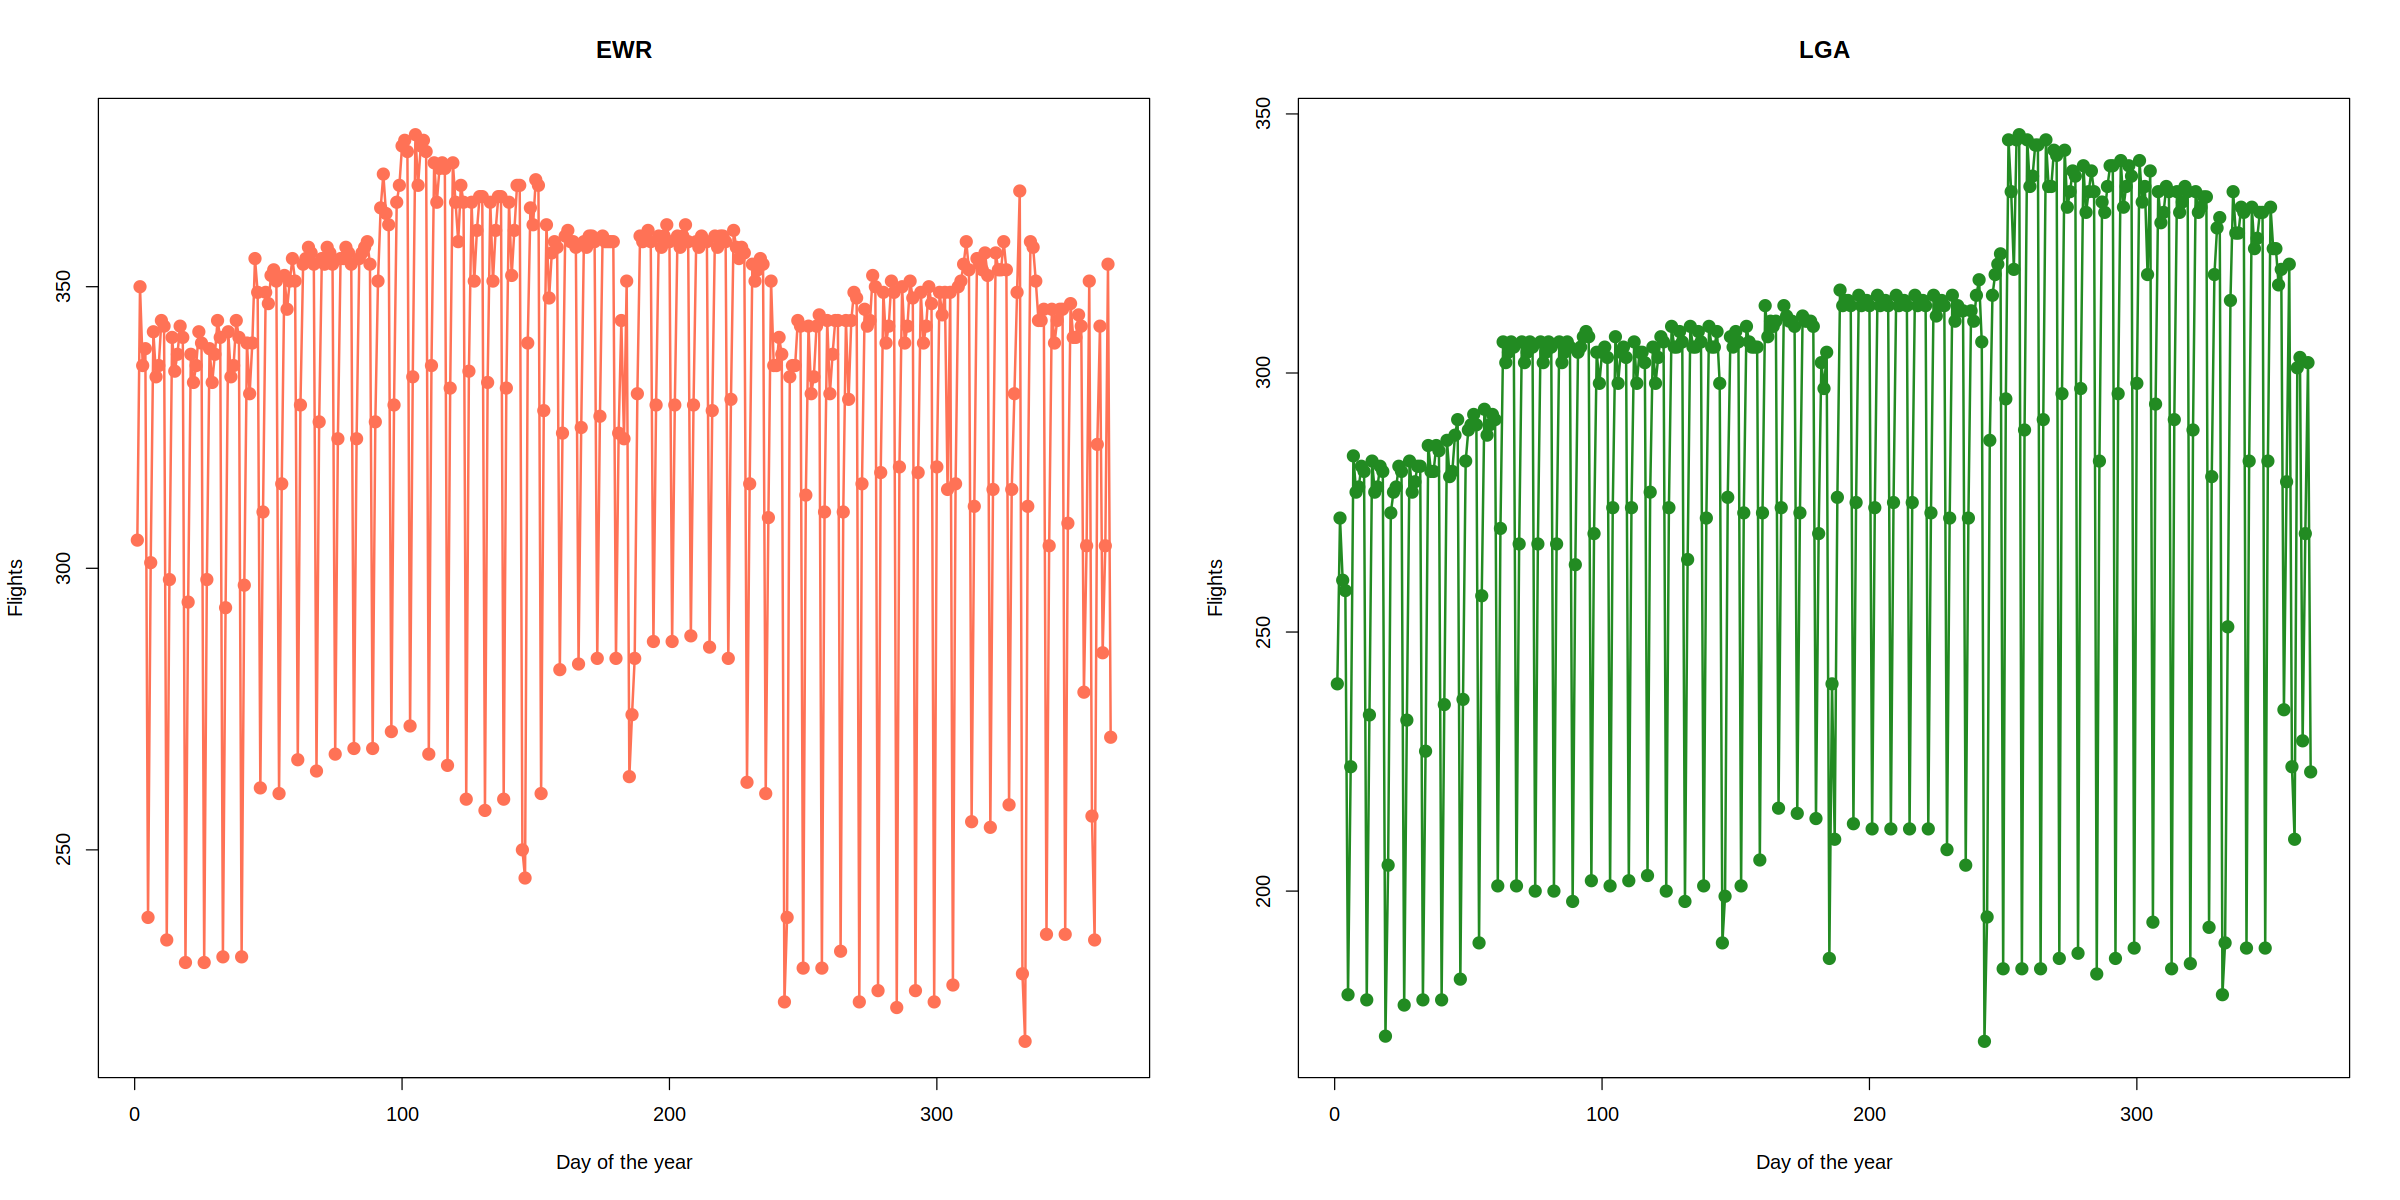

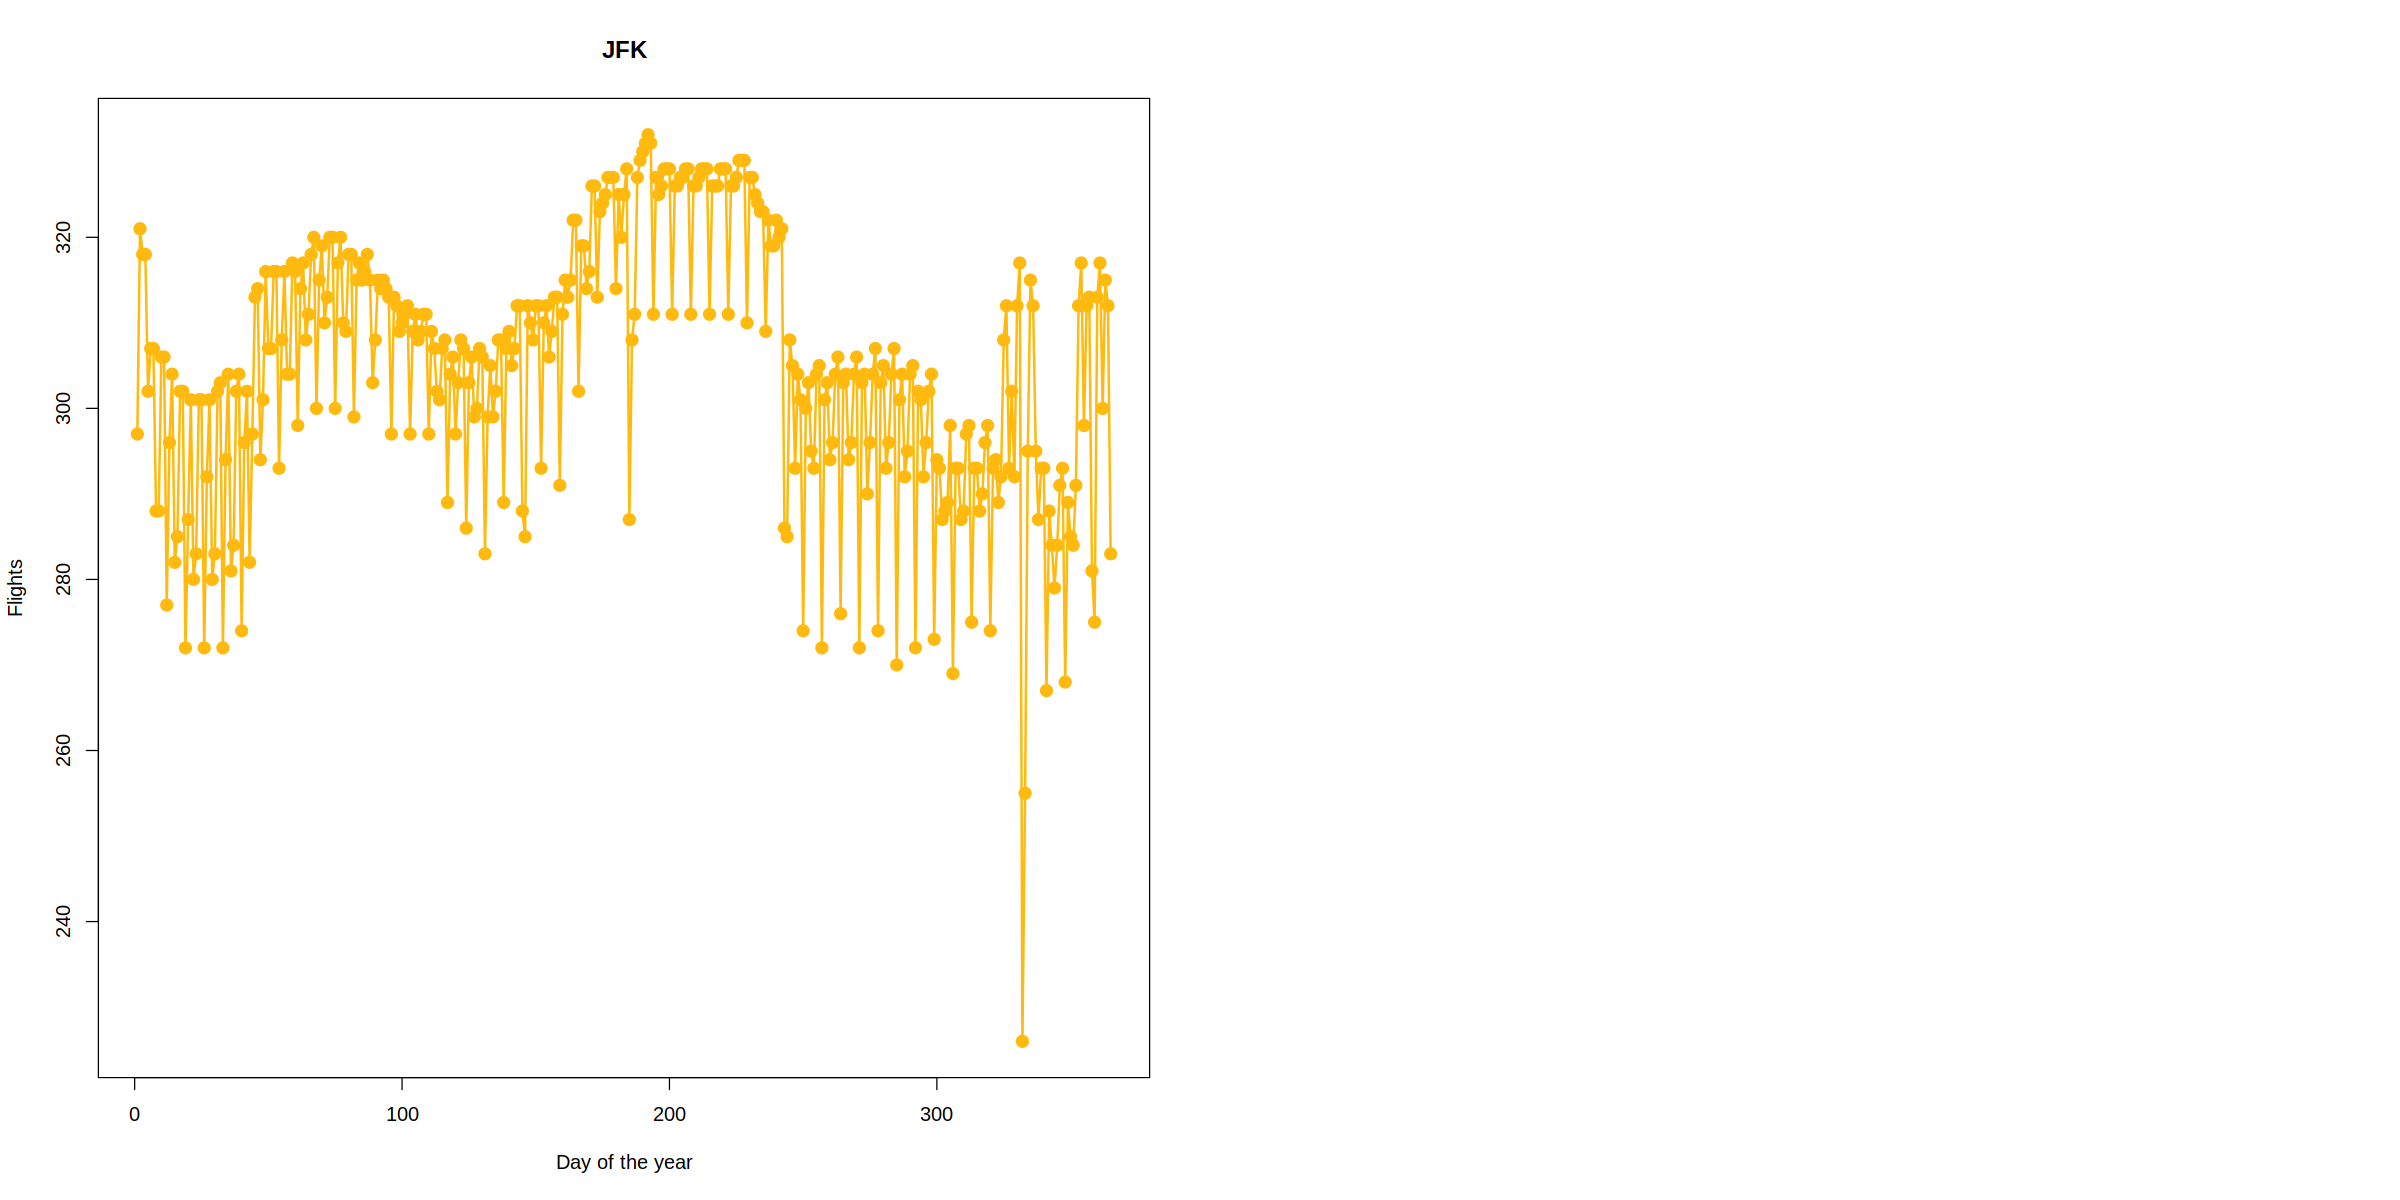

In [10]:
options(repr.plot.width = 20, repr.plot.height= 10)
par(mfrow=c(1,2))

plot(ewr_day$day, ewr_day$n_flights, pch=20, cex=2, col= 'coral1', main='EWR', xlab='Day of the year', ylab='Flights')
lines(ewr_day$day, ewr_day$n_flights, lwd=2, lty=1, col='coral1')

plot(lga_day$day, lga_day$n_flights, pch=20, cex=2, col= 'forestgreen', main='LGA', xlab='Day of the year', ylab='Flights')
lines(lga_day$day, lga_day$n_flights, lwd=2, lty=1, col='forestgreen')

plot(jfk_day$day, jfk_day$n_flights, pch=20, cex=2, col= 'darkgoldenrod1', main='JFK', xlab='Day of the year', ylab='Flights')
lines(jfk_day$day, jfk_day$n_flights, lwd=2, lty=1, col='darkgoldenrod1')

### 2.2 Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

In [11]:
fl <- fl %>% add_column(day_week=wday(fl$time_hour))  #adding day of the week

In [15]:
fl[fl$week_year==1,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,origin,dest,air_time,distance,hour,minute,time_hour,day_year,week_year,day_week
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1,1,3
2013,1,1,533,529,4,850,830,20,UA,⋯,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,1,1,3
2013,1,1,542,540,2,923,850,33,AA,⋯,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,1,1,3
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,1,1,3
2013,1,1,554,600,-6,812,837,-25,DL,⋯,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,1,1,3
2013,1,1,554,558,-4,740,728,12,UA,⋯,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,1,1,3
2013,1,1,555,600,-5,913,854,19,B6,⋯,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,1,1,3
2013,1,1,557,600,-3,709,723,-14,EV,⋯,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,1,1,3
2013,1,1,557,600,-3,838,846,-8,B6,⋯,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,1,1,3


In [13]:
#weekdays
week <- fl %>% filter(day_week!=1 & day_week!=7)
fl$week_year %>% max #check Number of weeks

[1] 53

In [19]:
week[week$week_year==2,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,origin,dest,air_time,distance,hour,minute,time_hour,day_year,week_year,day_week
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
2013,1,8,454,500,-6,625,648,-23,US,⋯,EWR,CLT,77,529,5,0,2013-01-08 05:00:00,8,2,2
2013,1,8,524,525,-1,837,820,17,UA,⋯,EWR,IAH,226,1400,5,25,2013-01-08 05:00:00,8,2,2
2013,1,8,531,540,-9,826,850,-24,AA,⋯,JFK,MIA,155,1089,5,40,2013-01-08 05:00:00,8,2,2
2013,1,8,540,540,0,1025,1017,8,B6,⋯,JFK,BQN,198,1576,5,40,2013-01-08 05:00:00,8,2,2
2013,1,8,544,530,14,853,829,24,UA,⋯,LGA,IAH,220,1416,5,30,2013-01-08 05:00:00,8,2,2
2013,1,8,550,600,-10,850,910,-20,AA,⋯,LGA,DFW,214,1389,6,0,2013-01-08 06:00:00,8,2,2
2013,1,8,551,600,-9,824,837,-13,DL,⋯,LGA,ATL,122,762,6,0,2013-01-08 06:00:00,8,2,2
2013,1,8,552,600,-8,650,703,-13,US,⋯,LGA,BOS,39,184,6,0,2013-01-08 06:00:00,8,2,2
2013,1,8,553,600,-7,819,815,4,FL,⋯,LGA,ATL,121,762,6,0,2013-01-08 06:00:00,8,2,2


In [14]:
week_one <- week[week$week_year==1,]

ERROR: Error in week$week_year: oggetto di tipo 'closure' non suddivisibile


In [18]:
week_fl <- tibble(week=seq(1,53),n_week=0,n_end=0)  #Define a tibble for week days and weekend

#have to correct for the fact that each week starts with tuesday and includes the monday of the following week
week_one <- fl[fl$week_year==1,] %>% filter(day_week!=2) #remove monday of next week
week_fl$n_week[1] <- (length(which(week_one$day_week!=7 & week_one$day_week!=1)))/4

In [20]:
week_fl$n_end[1] <- length(which(week_one$day_week==7 | week_one$day_week==1))/2

In [22]:
week_fl[1,]

week,n_week,n_end
<int>,<dbl>,<dbl>
1,903.5,776


In [24]:
n <- c(2:53)
for(i in n){
    week_n <- fl[fl$week_year==i,] %>% filter(day_week!=2) #remove monday of next week
    week_fl$n_week[i] <- (length(which(week_n$day_week!=7 & week_n$day_week!=1))+
                          length(which(fl$week_year==i-1 & fl$day_week==2)))/5     #add monday from prev week
    
    week_fl$n_end[i] <- length(which(week_n$day_week==7 | week_n$day_week==1))/2   
}

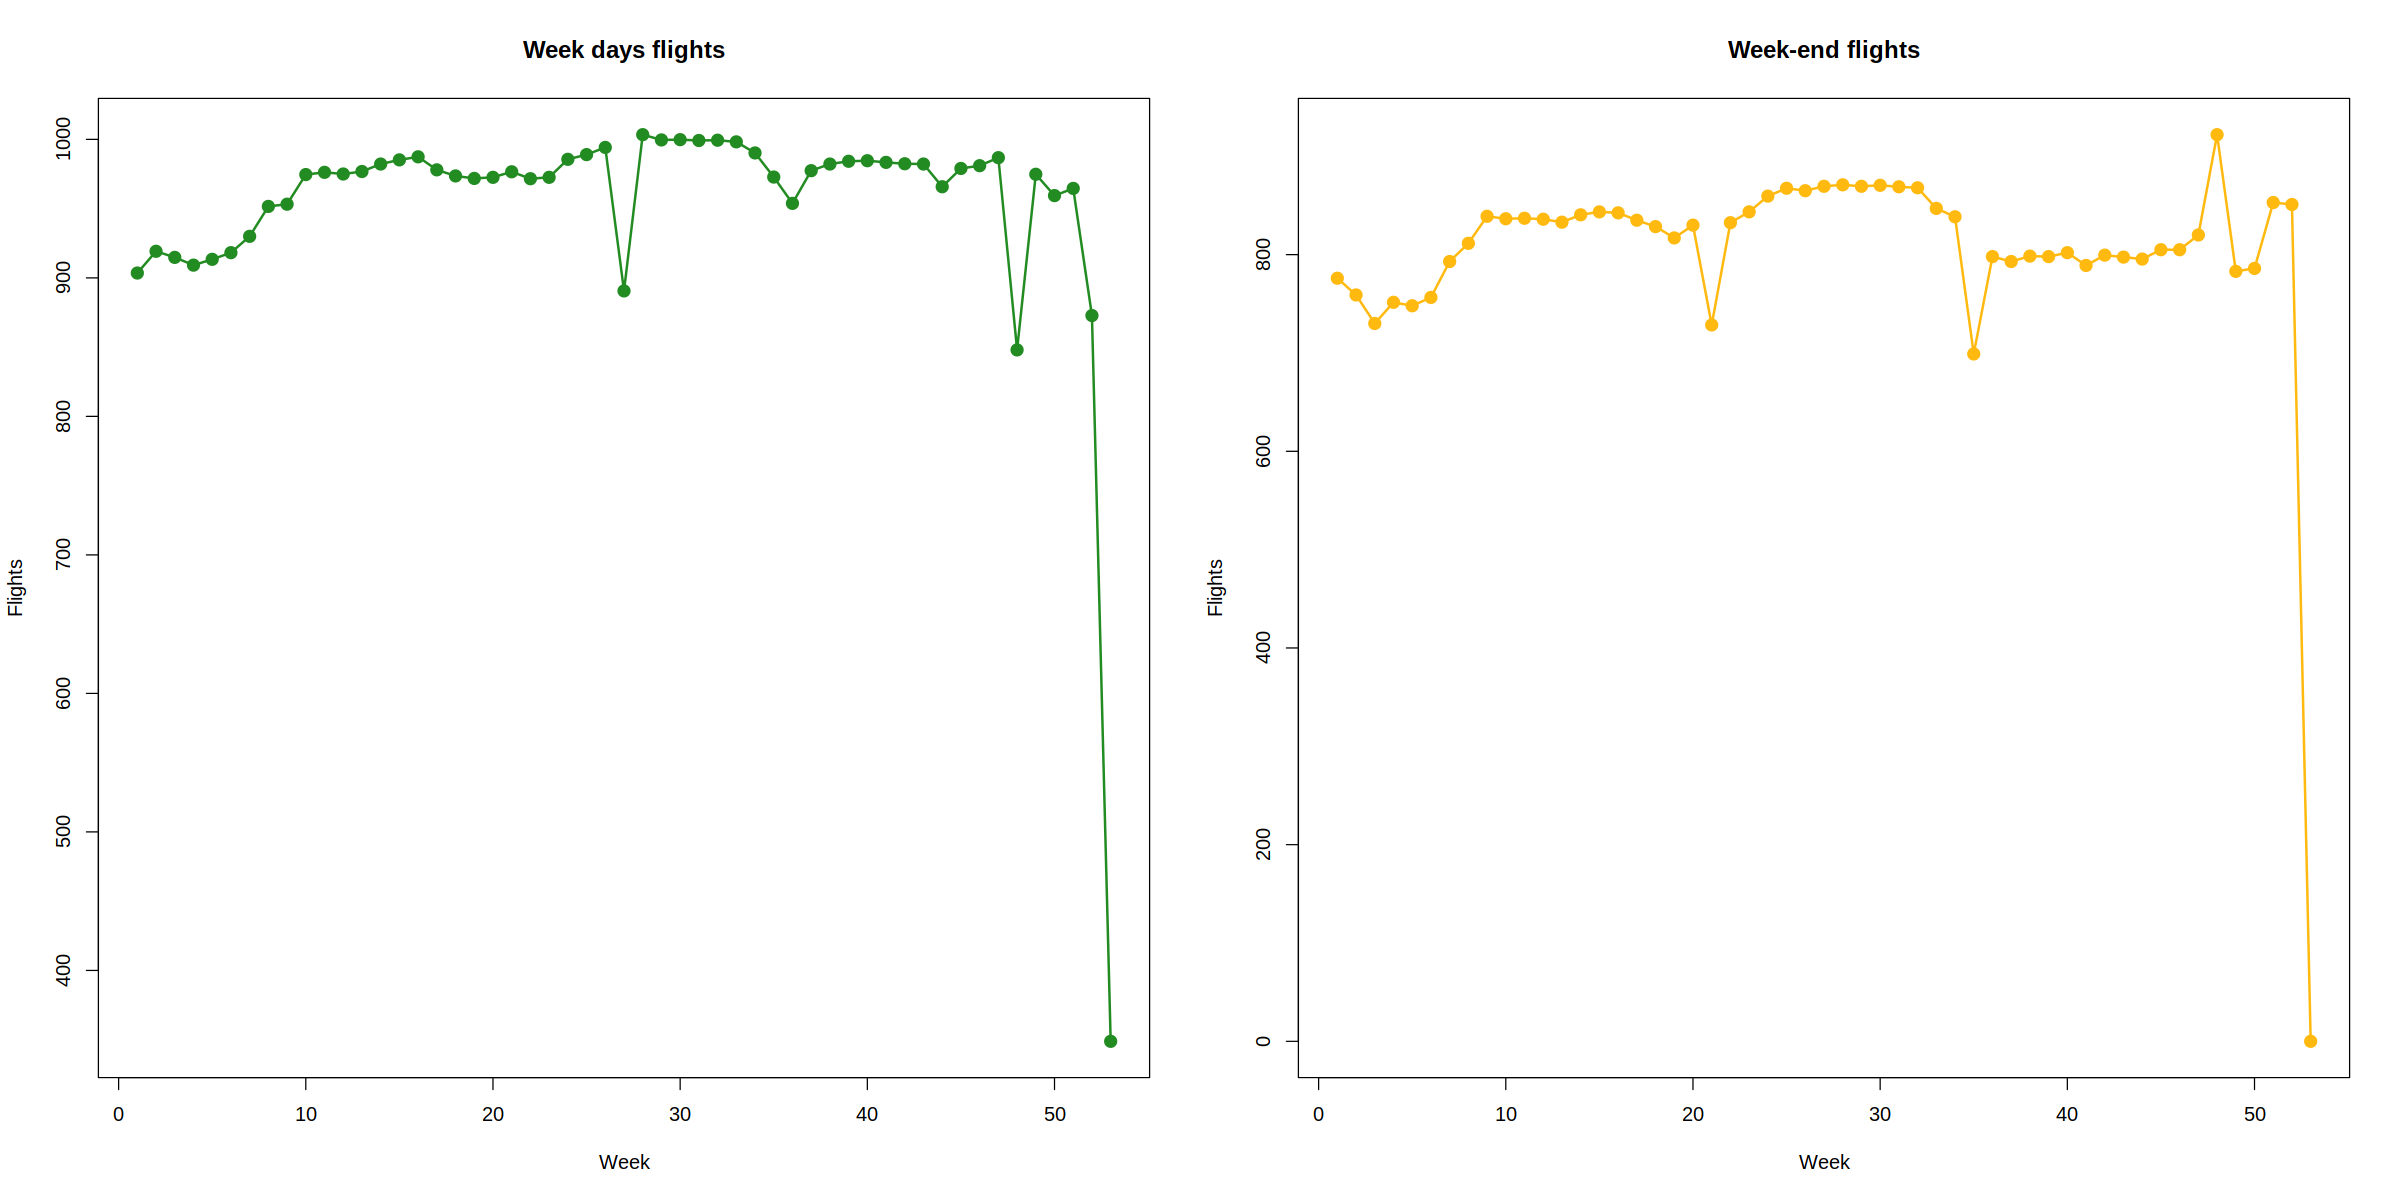

In [25]:
options(repr.plot.width = 20, repr.plot.height=10)
par(mfrow=c(1,2))

plot(week_fl$week, week_fl$n_week, cex=2, pch=20, col='forestgreen', main='Week days flights', xlab='Week',
    ylab='Flights')
lines(week_fl$week, week_fl$n_week, lwd=2, lty=1, col='forestgreen')

plot(week_fl$week, week_fl$n_end, cex=2, pch=20, col='darkgoldenrod1', main='Week-end flights', xlab='Week',
    ylab='Flights')
lines(week_fl$week, week_fl$n_end, lwd=2, lty=1, col='darkgoldenrod1')

### 2.3 For each flight in the data frame, compute the departure delay1 and extract the following pieces ofinformation (separately for each NYC airport):
- min, max and average delay for each day of the year (show the data in corresponding plots)

In [31]:
ewr[1:3,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,day_year,week_year
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1,1
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,1,1
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,1,1


In [28]:
fl$day_year %>% max()

[1] 365

In [56]:
ewr_delay <- tibble(day=seq(1,365), min.del=0,max.del=0,avg.del=0)

for(i in seq(1,365)){
    day <- ewr %>% filter(ewr$day_year==i)
    ewr_delay$min.del[i] <- day$dep_delay %>% min(na.rm=T)
    ewr_delay$max.del[i] <- day$dep_delay %>% max(na.rm=T)
    ewr_delay$avg.del[i] <- day$dep_delay %>% mean(na.rm=T)  
}

In [57]:
lga_delay <- tibble(day=seq(1,365), min.del=0,max.del=0,avg.del=0)

for(i in seq(1,365)){
    day <- lga[lga$day_year==i,] 
    lga_delay$min.del[i] <- day$dep_delay %>% min(na.rm=T)
    lga_delay$max.del[i] <- day$dep_delay %>% max(na.rm=T)
    lga_delay$avg.del[i] <- day$dep_delay %>% mean(na.rm=T)  
}

In [58]:
jfk_delay <- tibble(day=seq(1,365), min.del=0,max.del=0,avg.del=0)

for(i in seq(1,365)){
    day <- jfk[jfk$day_year==i,] 
    jfk_delay$min.del[i] <- day$dep_delay %>% min(na.rm=T)
    jfk_delay$max.del[i] <- day$dep_delay %>% max(na.rm=T)
    jfk_delay$avg.del[i] <- day$dep_delay %>% mean(na.rm=T)  
}

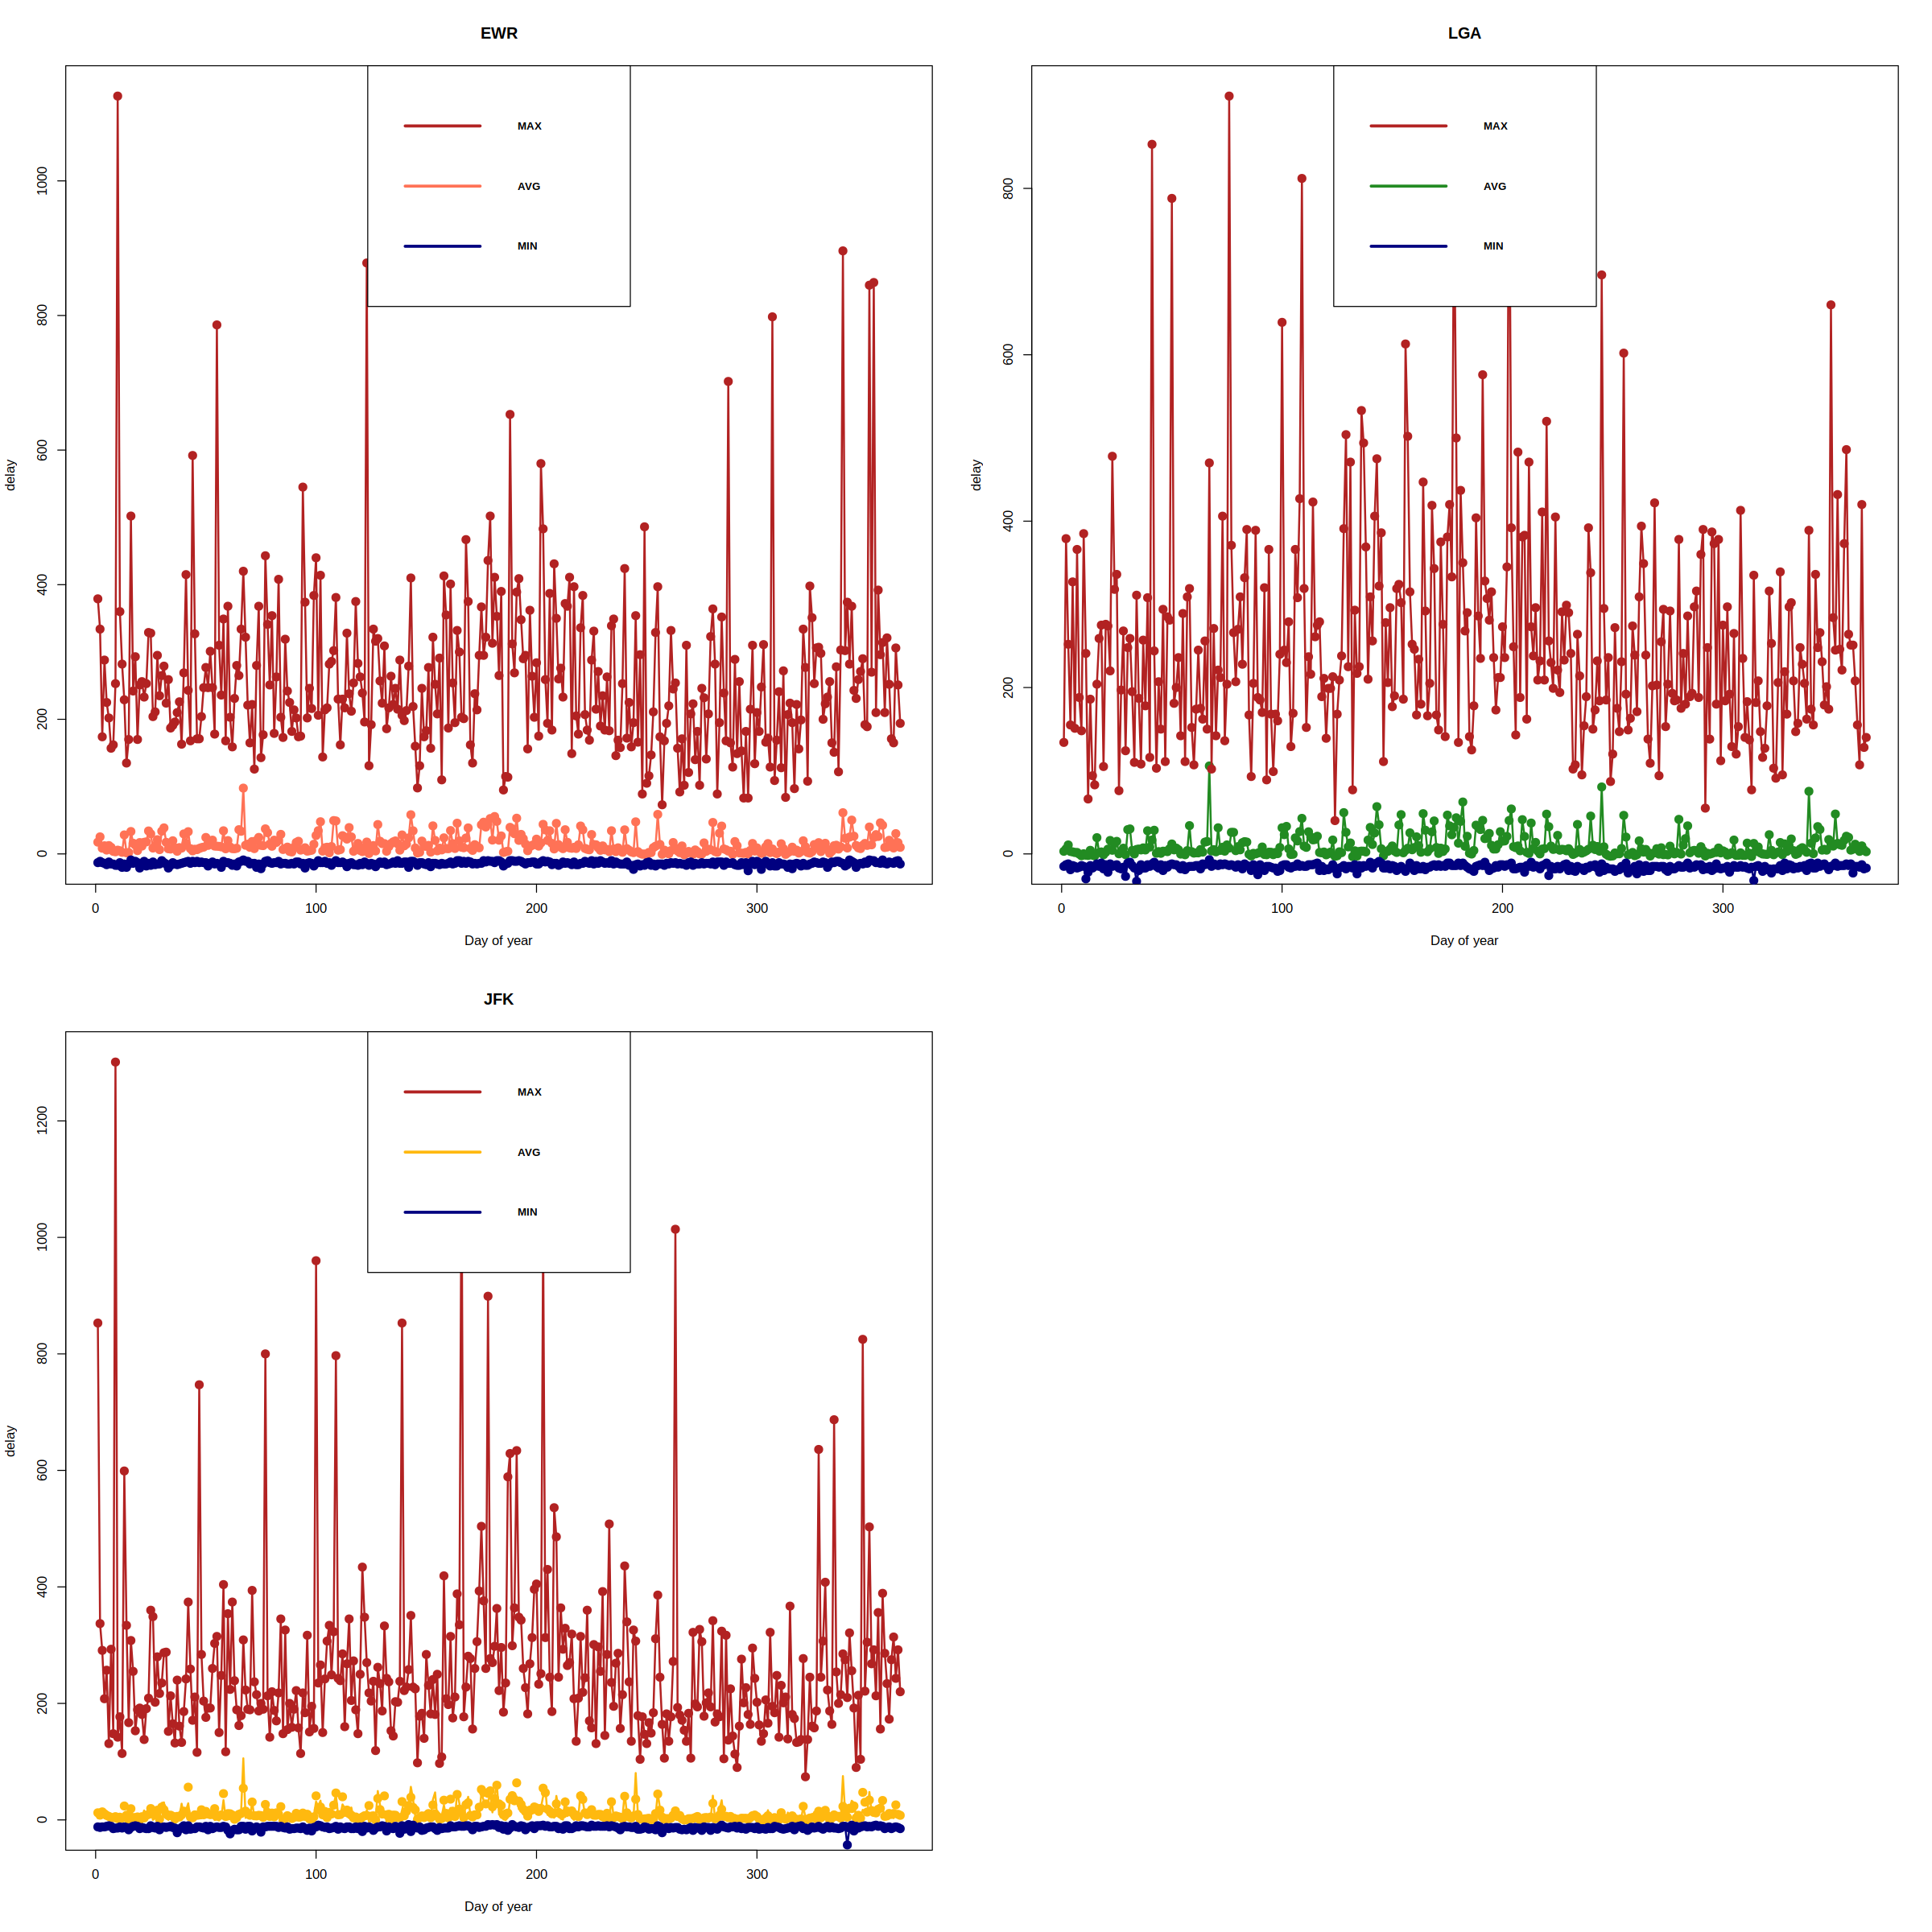

In [93]:
options(repr.plot.width=20, repr.plot.height=20)
par(mfrow = c(2,2))

plot(ewr_delay$day, ewr_delay$avg.del, cex=2, pch=20, col='coral1', main='EWR', xlab='Day of year', ylab='delay',
    ylim = c(0, max(ewr_delay$max.del)))
lines(ewr_delay$day, ewr_delay$avg.del, lty=1, lwd=2, col='coral1')
points(ewr_delay$day, ewr_delay$min.del,cex=2, pch=20,col='navy')
lines(ewr_delay$day, ewr_delay$min.del, lty=1, lwd=2, col='navy')
points(ewr_delay$day, ewr_delay$max.del,cex=2, pch=20,col='firebrick')
lines(ewr_delay$day, ewr_delay$max.del, lty=1, lwd=2, col='firebrick')
legend("top", c("MAX","AVG","MIN"), col=c('firebrick','coral1','navy'), cex=.8, lty=1,lwd=3,text.font = 2)


plot(lga_delay$day, lga_delay$avg.del, cex=2, pch=20, col='forestgreen', main='LGA', xlab='Day of year', ylab='delay',
    ylim = c(0, max(lga_delay$max.del)))
lines(lga_delay$day, lga_delay$avg.del, lty=1, lwd=2, col='forestgreen')
points(lga_delay$day, lga_delay$min.del,cex=2, pch=20,col='navy')
lines(lga_delay$day, lga_delay$min.del, lty=1, lwd=2, col='navy')
points(lga_delay$day, lga_delay$max.del,cex=2, pch=20,col='firebrick')
lines(lga_delay$day, lga_delay$max.del, lty=1, lwd=2, col='firebrick')
legend("top", c("MAX","AVG","MIN"), col=c('firebrick','forestgreen','navy'), cex=.8, lty=1,lwd=3,text.font = 2)


plot(jfk_delay$day, jfk_delay$avg.del, cex=2, pch=20, col='darkgoldenrod1', main='JFK', xlab='Day of year', ylab='delay',
    ylim = c(0, max(jfk_delay$max.del)))
lines(jfk_delay$day, lga_delay$avg.del, lty=1, lwd=2, col='darkgoldenrod1')
points(jfk_delay$day, jfk_delay$min.del,cex=2, pch=20,col='navy')
lines(jfk_delay$day, jfk_delay$min.del, lty=1, lwd=2, col='navy')
points(jfk_delay$day, jfk_delay$max.del,cex=2, pch=20,col='firebrick')
lines(jfk_delay$day, jfk_delay$max.del, lty=1, lwd=2, col='firebrick')
legend("top", c("MAX","AVG","MIN"), col=c('firebrick','darkgoldenrod1','navy'), cex=.8, lty=1,lwd=3,text.font = 2)



### 2.4 assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year

In [94]:
fl[1:3,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,origin,dest,air_time,distance,hour,minute,time_hour,day_year,week_year,day_week
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1,1,3
2013,1,1,533,529,4,850,830,20,UA,⋯,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,1,1,3
2013,1,1,542,540,2,923,850,33,AA,⋯,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,1,1,3


In [ ]:
fl <- fl %>% add_column('speed' = (fl$distance/fl$air_time)*60)  #speed in mph

In [97]:
avg_speed <- tibble(day=seq(1,365), avg=0)

for(i in seq(1,365)){
    day <- fl %>% filter(day_year==i)
    avg_speed$avg[i] <- day$speed %>% mean(na.rm=T)
}

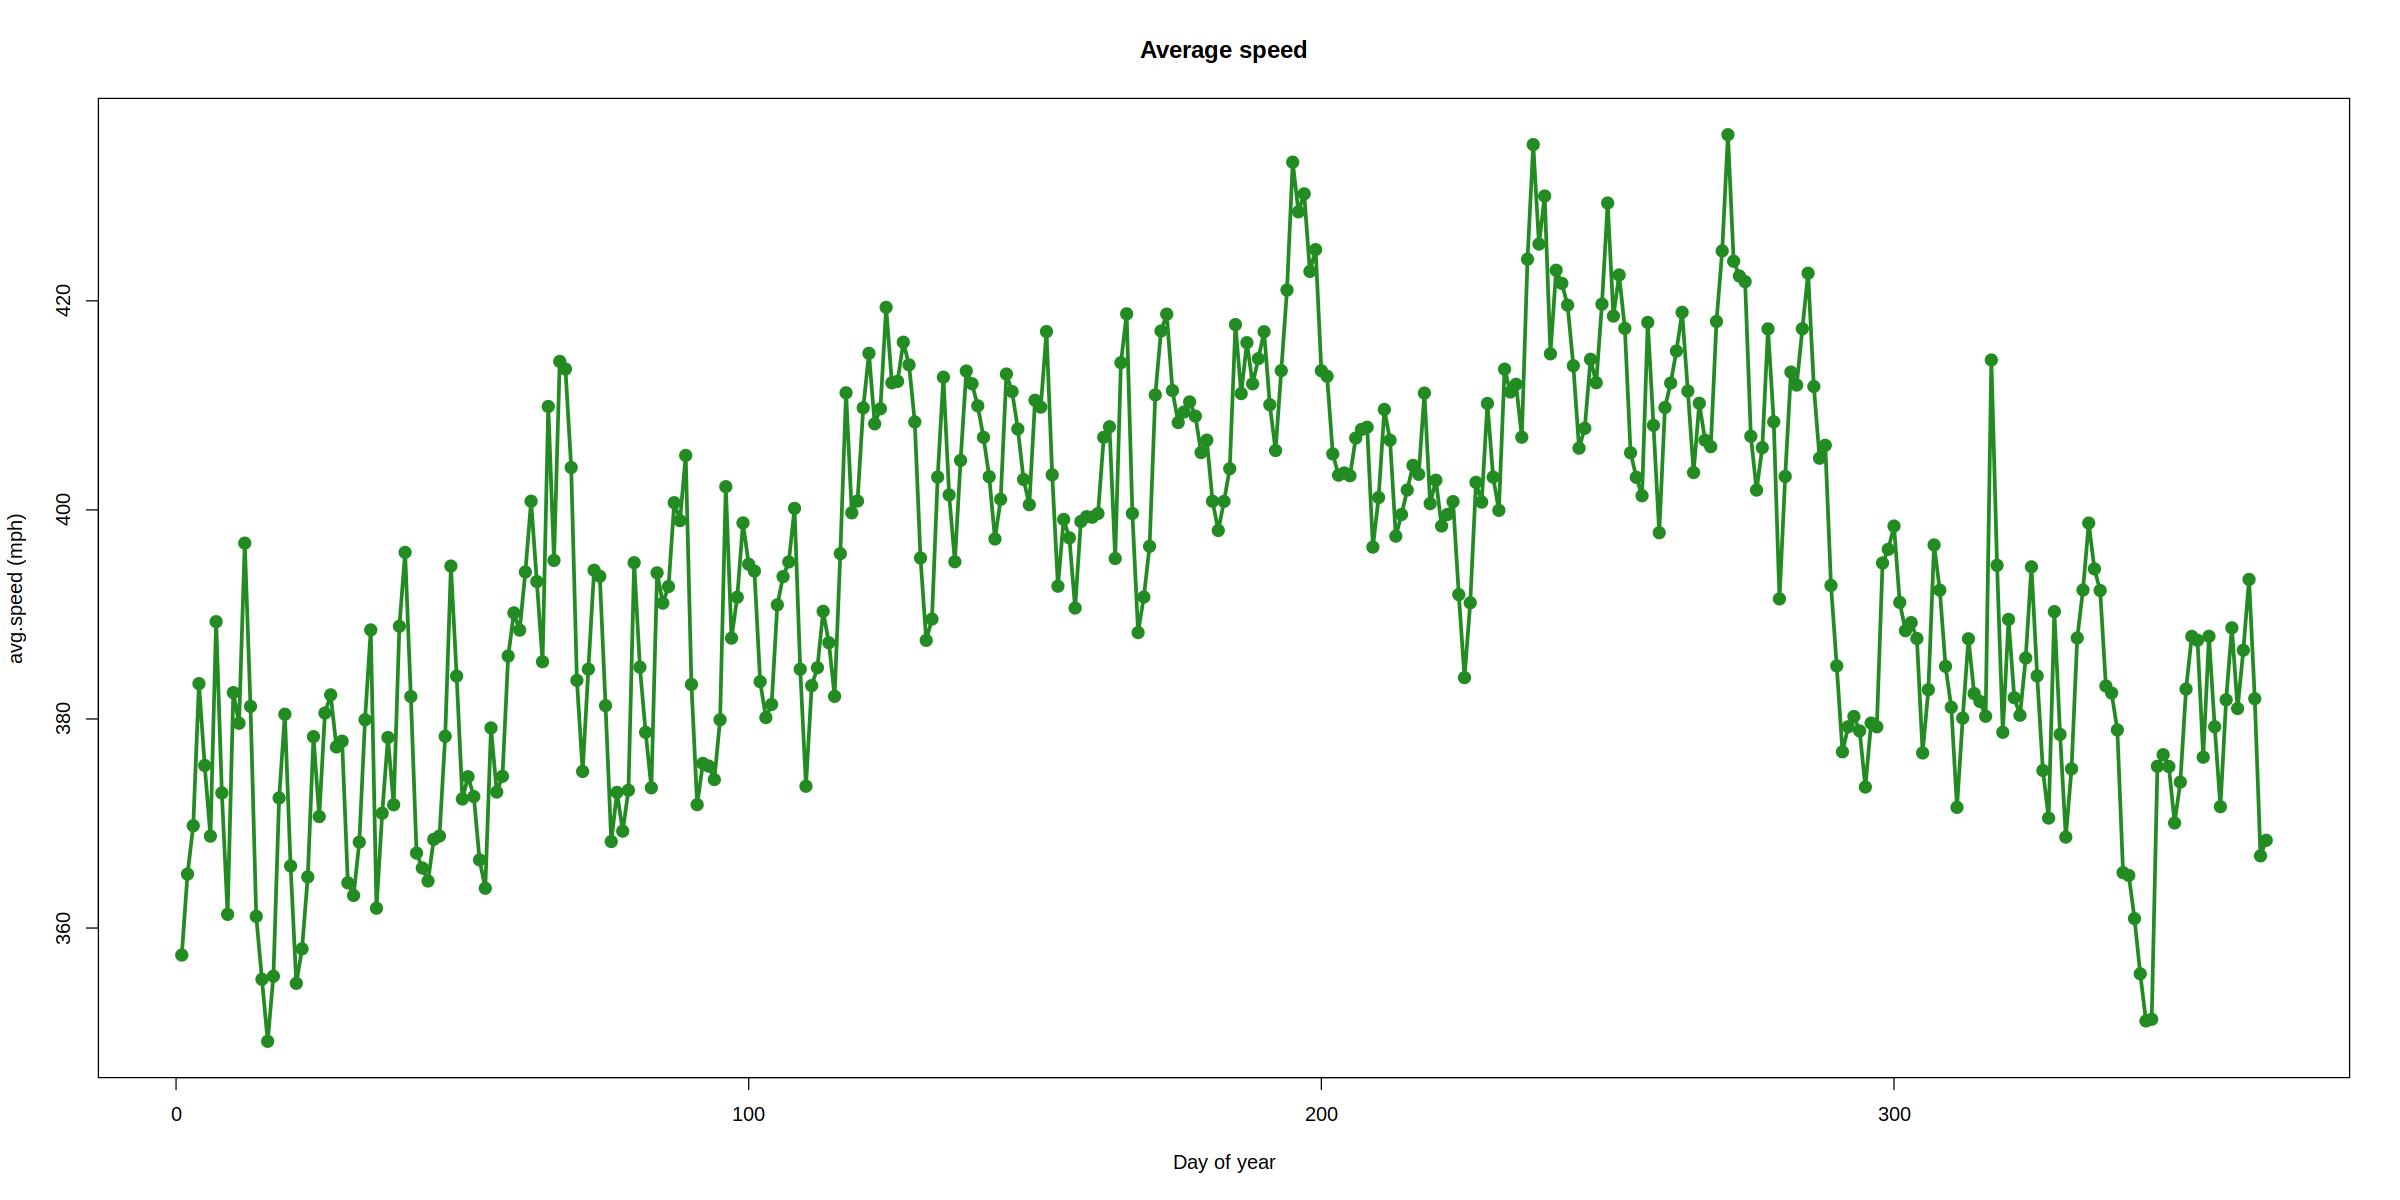

In [99]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow = c(1,1))

plot(avg_speed$day, avg_speed$avg, cex=2, pch=20, col='forestgreen', main='Average speed', xlab='Day of year', 
     ylab='avg.speed (mph)')
lines(avg_speed$day, avg_speed$avg, lty=1, lwd=3, col='forestgreen')

### 2.5 analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;
- the airline company offering the smallest number of flight per month;
- the airline company offering the longest distance flight per month.
(you can produce plots, if you like, to visualize the results of the analysis

### - DAY

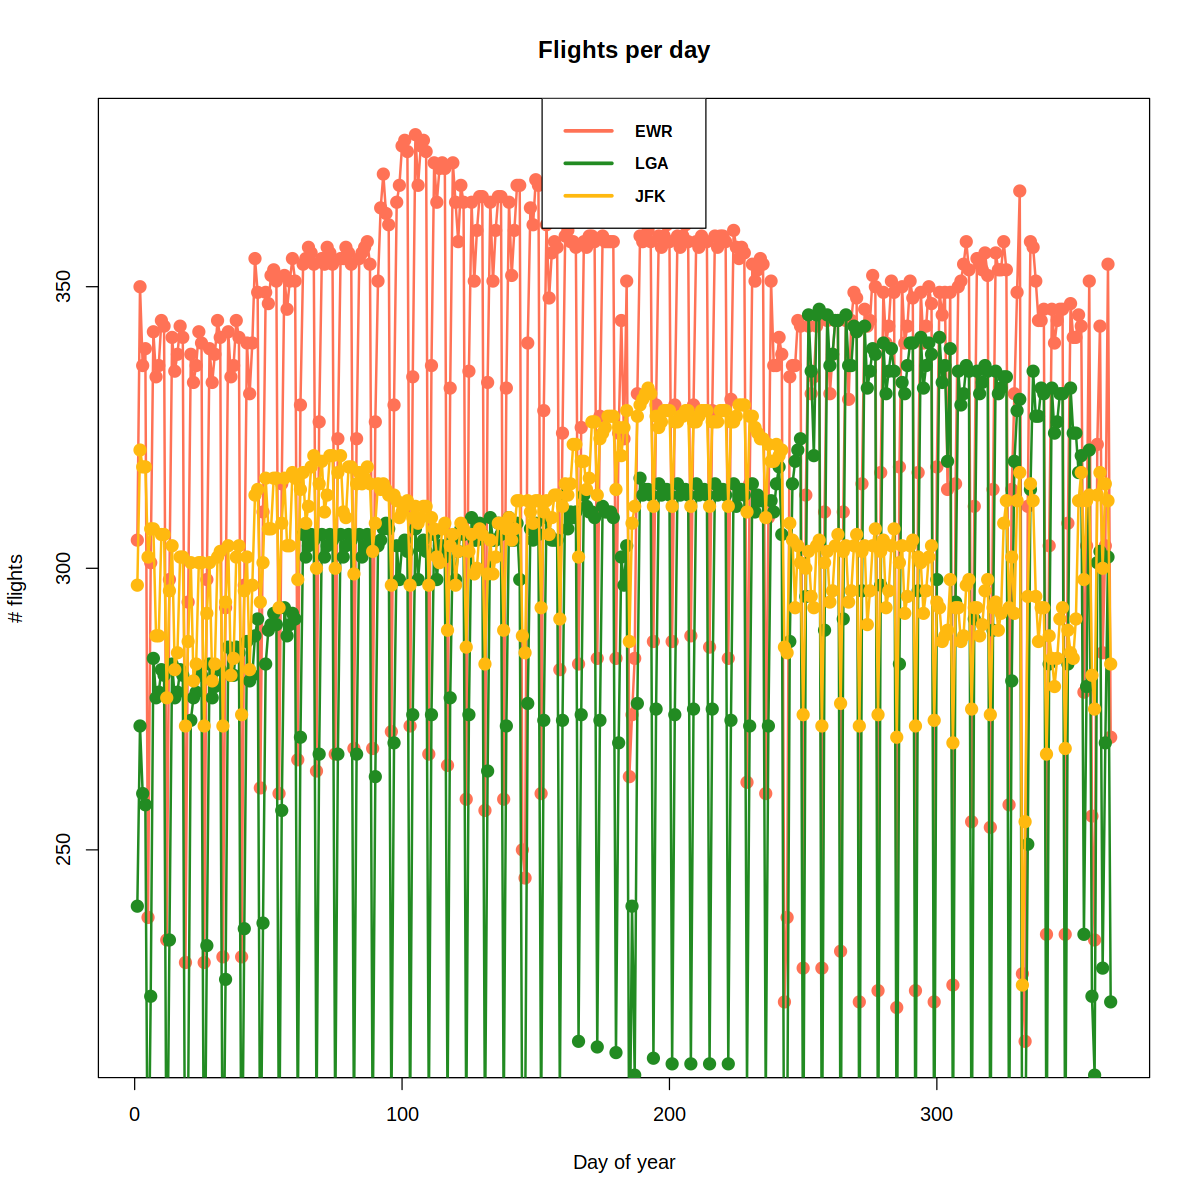

In [103]:
#Number of fligts per day: ewr_day, lga_day, jfk_day
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(1,1))

plot(ewr_day$day, ewr_day$n_flights, cex=2, pch=20, col='coral1', main='Flights per day', xlab='Day of year', 
     ylab='# flights')
lines(ewr_day$day, ewr_day$n_flights, lty=1, lwd=2, col='coral1')
points(lga_day$day, lga_day$n_flights, cex=2, pch=20, col='forestgreen')
lines(lga_day$day, lga_day$n_flights, lty=1, lwd=2, col='forestgreen')
points(jfk_day$day, jfk_day$n_flights, cex=2, pch=20, col='darkgoldenrod1')
lines(jfk_day$day, jfk_day$n_flights, lty=1, lwd=2, col='darkgoldenrod1')
legend("top", c("EWR","LGA","JFK"), col=c('coral1','forestgreen','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)


In [104]:
max(max(ewr_day$n_flights), max(lga_day$n_flights), max(jfk_day$n_flights))
cat('Max of ewr: ',max(ewr_day$n_flights), 'Max of lga: ',max(lga_day$n_flights),'Max of jfk: ',max(jfk_day$n_flights))

[1] 377

Max of ewr:  377 Max of lga:  346 Max of jfk:  332

In [109]:
cat('The largest number of flights per day is offered by EWR: ', max(ewr_day$n_flights), 'Flights in day ', 
   ewr_day[ewr_day$n_flights==377,]$day)

The largest number of flights per day is offered by EWR:  377 Flights in day  105

### - WEEK

In [110]:
#Number of fligts per week:
#Creating a tibble to store the number of flights per week
ewr_week <- tibble(week=seq(1,53),n_flights=0)
lga_week <- tibble(week=seq(1,53),n_flights=0)
jfk_week <- tibble(week=seq(1,53),n_flights=0)

x <- seq(1,53)                                         #EWR
for (i in x) {
    ewr_week$n_flights[i]<-length(which(ewr$week_year == i))
    lga_week$n_flights[i]<-length(which(lga$week_year == i))
    jfk_week$n_flights[i] <- length(which(jfk$week_year == i))
    }


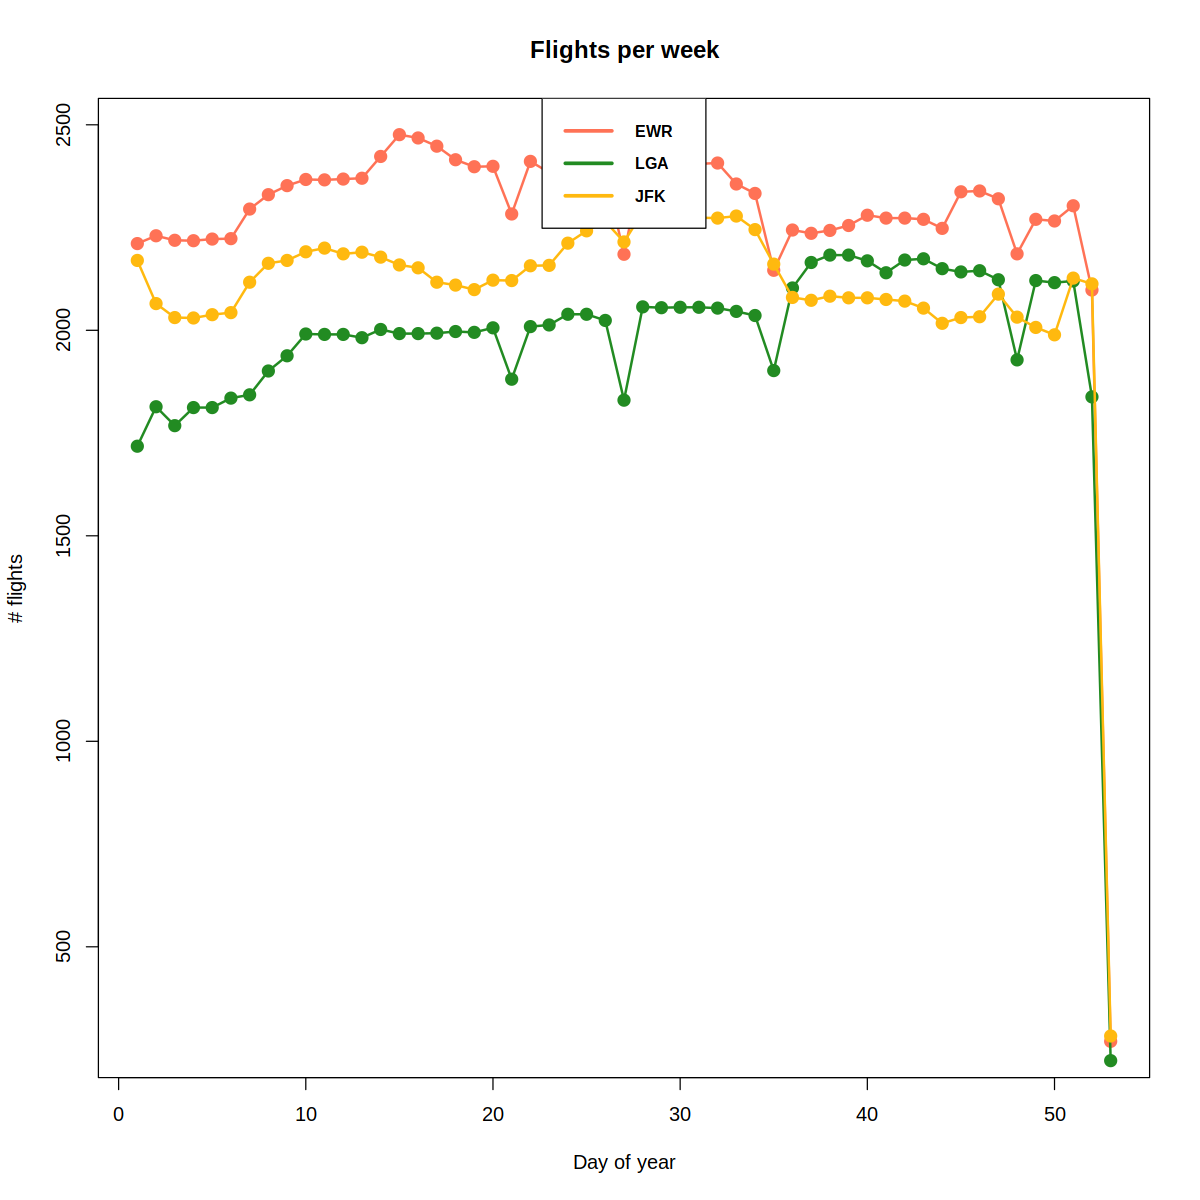

In [111]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(1,1))

plot(ewr_week$week, ewr_week$n_flights, cex=2, pch=20, col='coral1', main='Flights per week', xlab='Day of year', 
     ylab='# flights')
lines(ewr_week$week, ewr_week$n_flights, lty=1, lwd=2, col='coral1')
points(lga_week$week, lga_week$n_flights, cex=2, pch=20, col='forestgreen')
lines(lga_week$week, lga_week$n_flights, lty=1, lwd=2, col='forestgreen')
points(jfk_week$week, jfk_week$n_flights, cex=2, pch=20, col='darkgoldenrod1')
lines(jfk_week$week, jfk_week$n_flights, lty=1, lwd=2, col='darkgoldenrod1')
legend("top", c("EWR","LGA","JFK"), col=c('coral1','forestgreen','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)

In [112]:
max(max(ewr_week$n_flights), max(lga_week$n_flights), max(jfk_week$n_flights))
cat('Max of ewr: ',max(ewr_week$n_flights), 'Max of lga: ',max(lga_week$n_flights),'Max of jfk: ',max(jfk_week$n_flights))

[1] 2476

Max of ewr:  2476 Max of lga:  2183 Max of jfk:  2287

In [113]:
cat('The largest number of flights per day is offered by EWR: ', max(ewr_week$n_flights), 'Flights in week ', 
   ewr_week[ewr_week$n_flights==max(ewr_week$n_flights),]$week)

The largest number of flights per day is offered by EWR:  2476 Flights in week  15

### - MONTH

In [114]:
ewr_month <- tibble(month=seq(1,12),n_flights=0)
lga_month <- tibble(month=seq(1,12),n_flights=0)
jfk_month <- tibble(month=seq(1,12),n_flights=0)
x <- seq(1,12)                                         #EWR
for (i in x) {
    ewr_month$n_flights[i]<-length(which(ewr$month == i))
    lga_month$n_flights[i]<-length(which(lga$month == i))
    jfk_month$n_flights[i] <- length(which(jfk$month == i))
    }


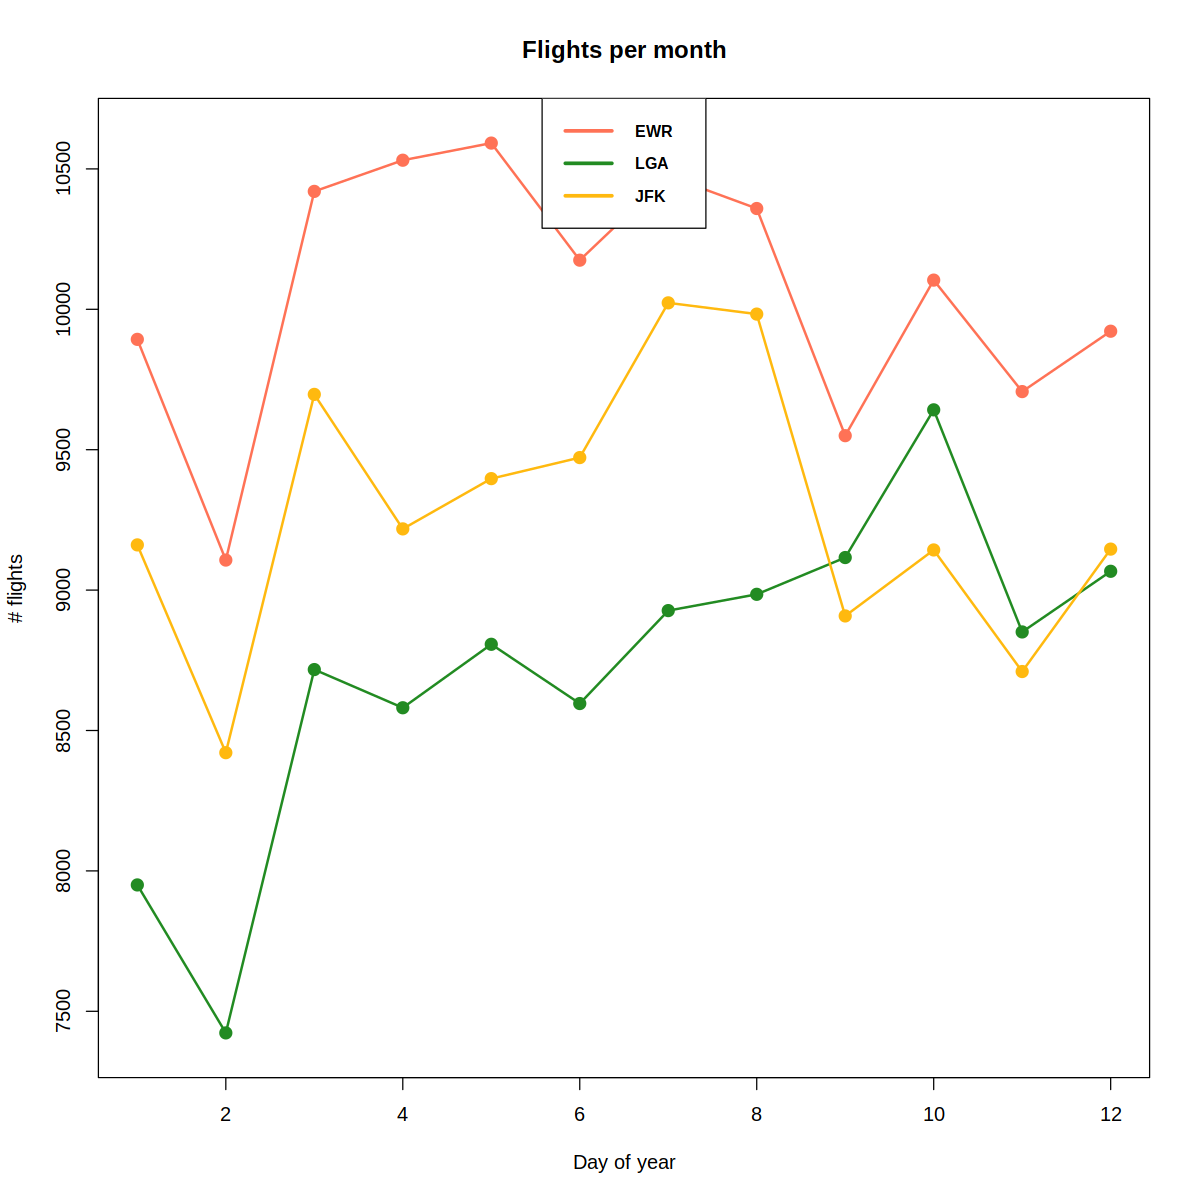

In [116]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(1,1))

plot(ewr_month$month, ewr_month$n_flights, cex=2, pch=20, col='coral1', main='Flights per month', xlab='Day of year', 
     ylab='# flights', ylim=c(min(lga_month$n_flights)-30,max(ewr_month$n_flights)+30))
lines(ewr_month$month, ewr_month$n_flights, lty=1, lwd=2, col='coral1')
points(lga_month$month, lga_month$n_flights, cex=2, pch=20, col='forestgreen')
lines(lga_month$month, lga_month$n_flights, lty=1, lwd=2, col='forestgreen')
points(jfk_month$month, jfk_month$n_flights, cex=2, pch=20, col='darkgoldenrod1')
lines(jfk_month$month, jfk_month$n_flights, lty=1, lwd=2, col='darkgoldenrod1')
legend("top", c("EWR","LGA","JFK"), col=c('coral1','forestgreen','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)

In [117]:
min(min(ewr_month$n_flights), min(lga_month$n_flights), min(jfk_month$n_flights))
cat('Min of ewr: ',min(ewr_month$n_flights), 'Min of lga: ',min(lga_month$n_flights),'Min of jfk: ',
    min(jfk_month$n_flights))

[1] 7423

Min of ewr:  9107 Min of lga:  7423 Min of jfk:  8421

In [118]:
cat('The smallest number of flights per day is offered by LGA: ', min(lga_month$n_flights), 'Flights in month ', 
   lga_month[lga_month$n_flights==min(lga_month$n_flights),]$month)

The smallest number of flights per day is offered by LGA:  7423 Flights in month  2

### - LONGEST DISTANCE PER MONTH

In [125]:
#am_plot <- aggregate(cbind(Full.time , Part.time, Grand.Total) ~ Year , american ,mean)

ewr_dmonth <- aggregate(cbind(distance) ~ month ,ewr, max)

In [129]:
lga_dmonth <- aggregate(cbind(distance) ~ month ,lga, max)
jfk_dmonth <- aggregate(cbind(distance) ~ month ,jfk, max)

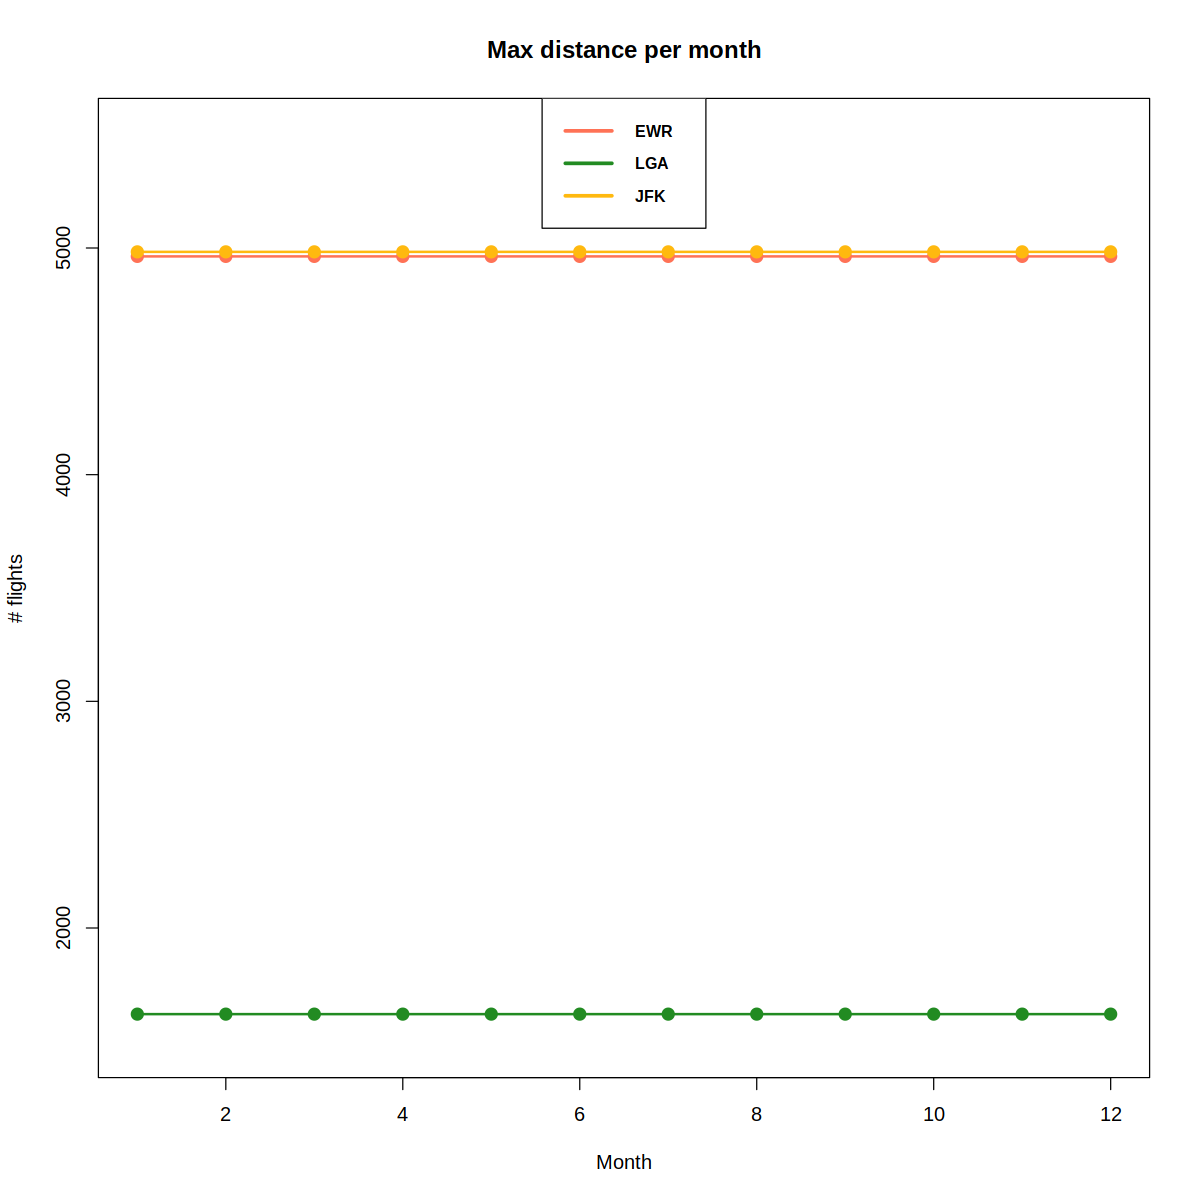

In [142]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(1,1))

plot(ewr_dmonth$month, ewr_dmonth$distance, cex=2, pch=20, col='coral1', main='Max distance per month',
     xlab='Month', ylab='# flights', ylim=c(1500,5500))
lines(ewr_dmonth$month, ewr_dmonth$distance, lty=1, lwd=2, col='coral1')
points(lga_dmonth$month, lga_dmonth$distance, cex=2, pch=20, col='forestgreen')
lines(lga_dmonth$month, lga_dmonth$distance, lty=1, lwd=2, col='forestgreen')
points(jfk_dmonth$month, jfk_dmonth$distance, cex=2, pch=20, col='darkgoldenrod1')
lines(jfk_dmonth$month, jfk_dmonth$distance, lty=1, lwd=2, col='darkgoldenrod1')
legend("top", c("EWR","LGA","JFK"), col=c('coral1','forestgreen','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)

In [137]:
max(max(ewr_dmonth$distance), max(lga_dmonth$distance), max(jfk_dmonth$distance))
cat('Max of ewr: ',max(ewr_dmonth$distance), 'Max of lga: ',max(lga_dmonth$distance),'Max of jfk: ',
    max(jfk_dmonth$distance))

[1] 4983

Max of ewr:  4963 Max of lga:  1620 Max of jfk:  4983

In [143]:
cat('The largest distance per month is offered by JFK: ', max(jfk_dmonth$distance))

The largest distance per month is offered by JFK:  4983